# Flu Shot Learning: Predicting Whether Individuals got their H1N1 Vaccines

# 1 Business Understanding

## Introduction 

In this project, machine learning will be employed to estimate the probability of individuals taking the H1N1 and seasonal flu vaccines, aiming to shed light on people's vaccination behavior

<img src = 'https://www.paho.org/sites/default/files/styles/max_1500x1500/public/hero/2022-10/vaccine-1500x742.jpg?itok=ezQdDgu0'>

## Overview

The spread of infectious diseases is a major public health concern. In the recent past, the world witnessed the outbreak of the COVID-19 pandemic that caused significant loss of life and disrupted economies. The public health response to such pandemics often involves the distribution of vaccines, which are seen as a key tool to control the spread of diseases. The purpose of this project is to understand the public's behavior towards receiving vaccines by revisiting the response to the H1N1 flu pandemic that swept the world in 2009. The aim of the project is to develop a classification model that can predict the likelihood of individuals receiving the H1N1 and seasonal flu vaccines.

## Business Problem

The National 2009 H1N1 Flu Survey was conducted in the United States in late 2009 and early 2010. The survey aimed to understand the public's perception and behavior towards receiving the H1N1 and seasonal flu vaccines. The goal of this project is to use demographic, social, economic, and health-related data to build a classification model that can predict the likelihood of individuals receiving these vaccines. The success of this project will be measured by the accuracy, recall, and precision scores of the model.

## Main Objective

The **main objective** of this project is to develop a classification model to  predicts the response of individuals to H1N1 and seasonal flu vaccines. The model should be able to identify the factors that affect individuals' response to vaccines and provide actionable insights on how to reduce the spread of contagious infections. The end goal is to contribute to the reduction of the spread of infectious diseases through the principle of herd immunity.

## Methodology

The methodology for this project will involve the following steps: <br>

1.Business Understanding<br>
2.Data Understanding: Use the data from the National 2009 H1N1 Flu Survey and any additional relevant data sources.<br>
3.Data Cleaning and Pre-processing: Clean and pre-process the data to remove missing or irrelevant information.<br> 
4.Exploratory Data Analysis (EDA): Perform exploratory data analysis to understand the distribution and relationships between the different variables.<br>
5.Model Selection and Training: Select the appropriate machine learning algorithms and train the model using the pre-processed data.<br>
6.Model Evaluation: Evaluate the performance of the model using accuracy, recall, and precision scores.<br>
7.Conclusion.<br>
8.Recommendation <br>

# 2. Data Understanding 

This is a binary classification problem where the aim is to predict whether an individual will receive the H1N1 and seasonal flu vaccines (0 = No; 1 = Yes) based on 35 features. The used is from <a href = 'https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/'> Driven Data</a> and it  has 36 columns, with respondent_id being a unique identifier and the rest being features such as demographics, health information, personal behavior related to flu and vaccination, H1N1 flu concern and knowledge, doctor recommendations, medical conditions, age, education, race, sex, income, marital status, housing, employment, geographic region, number of adults and children in household, and industry and occupation. Most features are binary (0 or 1), while a few have multiple levels.

The target variables are binary (0 = No, 1 = Yes) and the problem is formulated as a multilabel classification problem.<br>
* h1n1_concern - Level of concern about the H1N1 flu.<br>
* h1n1_knowledge - Level of knowledge about H1N1 flu.<br>
* behavioral_antiviral_meds - Has taken antiviral medications. (binary)<br>
* behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary))<br>
* behavioral_face_mask - Has bought a face mask. (binary))<br>
* behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary))<br>
* behavioral_large_gatherings - Has reduced time at large gatherings. (binary))<br>
* behavioral_outside_home - Has reduced contact with people outside of own household. (binary))<br>
* behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary))<br>
* doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary))<br>
* doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary))<br>
* chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
* child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
* health_worker - Is a healthcare worker. (binary)<br>
* health_insurance - Has health insurance. (binary)<br>
* opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.<br>
* opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.<br>
* opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.<br>
* opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.<br>
* opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.<br>
* opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.<br>
* age_group - Age group of respondent.<br>
* education - Self-reported education level.<br>
* race - Race of respondent.<br>
* sex - Sex of respondent.<br>
* income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.<br>
* marital_status - Marital status of respondent.<br>
* rent_or_own - Housing situation of respondent.<br>
* employment_status - Employment status of respondent.<br>
* hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.<br>
* census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.<br>
* household_adults - Number of other adults in household, top-coded to 3.<br>
* household_children - Number of children in household, top-coded to 3.<br>
* employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.<br>
* employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.<br>
    </div>

# 3. Data Preparation

## 3.1 loading and exploring the dataset

In [4]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve, auc, r2_score, mean_squared_error

### 3.1.1 Training_set_features

In [5]:
# loading the dataset
training_set = pd.read_csv('training_set_features.csv') 

In [6]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_set dataframe are:")
training_set.head()

The first 5 rows of the training_set dataframe are:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [7]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_set dataframe are:")
training_set.head()

The first 5 rows of the training_set dataframe are:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [8]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the training_set dataframe are:")
training_set.dtypes

The data types of the columns in the training_set dataframe are:


respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [9]:
# Check the shape of the dataframe
print("The shape of the training_set dataframe is:", training_set.shape)

The shape of the training_set dataframe is: (26707, 36)


In [10]:
# Check if there are any missing values in the dataframe
print("The number of missing values in each column of the training_set dataframe is:")
training_set.isna().sum()

The number of missing values in each column of the training_set dataframe is:


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [11]:
# Check the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the training_set dataframe are:")
training_set.describe()

The summary statistics of the numerical columns in the training_set dataframe are:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26579.000000  ...   25903.000000       14433.00000   
mean                0.677264  ...       0.111918           0.87972   
std                 0.467531  ...       0.315271           0.32530   
min                 0.000000  ...       0.000000           0.00000   
25%                 0.000000  ...       0.000000           1.00000   
50%                 1.000000  ...       0.000000           1.00000   
75%                 1.000000  ...       0.000000           1.00000   
max                 1.000000  ...       1.000000           1.00000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332

### 3.1.2 Cleaning training set labels

In [12]:
#Addressing the Binary Columns
binary_columns_1 = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'household_adults', 'household_children']
binary_columns_2 = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

#Replacing missing values in binary_columns_1 with 0
training_set[binary_columns_1] = training_set[binary_columns_1].fillna(0)

#Replacing missing values in binary_columns_2 with 1
training_set[binary_columns_2] = training_set[binary_columns_2].fillna(1)

In [13]:
#Handling Missing Data 
missing_strings = ['income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'education',
'employment_industry', 'employment_occupation']

training_set[missing_strings] = training_set[missing_strings].fillna("Not Available")

In [14]:
#Checking for missing values in the training features data
missing_values = training_set.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0


In [15]:
#Check for Duplicate Rows
has_duplicates = training_set.duplicated().any()
has_duplicates

False

### 3.2.1 training_set_labels

In [16]:
# loading the dataset
training_label = pd.read_csv('training_set_labels.csv') 

In [17]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_label dataframe are:")
training_label.head()

The first 5 rows of the training_label dataframe are:


respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [18]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_label dataframe are:")
training_label.tail()

The first 5 rows of the training_label dataframe are:


respondent_id  h1n1_vaccine  seasonal_vaccine
26702          26702             0                 0
26703          26703             0                 0
26704          26704             0                 1
26705          26705             0                 0
26706          26706             0                 0

In [19]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the training_label dataframe are:")
training_label.dtypes

The data types of the columns in the training_label dataframe are:


respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

In [20]:
# Check the shape of the dataframe
print("The shape of the training_set dataframe is:", training_label.shape)

The shape of the training_set dataframe is: (26707, 3)


In [21]:
# Check if there are any missing values in the dataframe
print("The number of missing values in each column of the training_label dataframe is:")
training_label.isna().sum()

The number of missing values in each column of the training_label dataframe is:


respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [22]:
# Check the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the training_set dataframe are:")
training_label.describe()

The summary statistics of the numerical columns in the training_set dataframe are:


respondent_id  h1n1_vaccine  seasonal_vaccine
count   26707.000000  26707.000000      26707.000000
mean    13353.000000      0.212454          0.465608
std      7709.791156      0.409052          0.498825
min         0.000000      0.000000          0.000000
25%      6676.500000      0.000000          0.000000
50%     13353.000000      0.000000          0.000000
75%     20029.500000      0.000000          1.000000
max     26706.000000      1.000000          1.000000

In [23]:
#checking for duplicated values
training_label.duplicated().sum()

0

### 3.3.1 test_set_features

In [24]:
#Importing and parsing the training_set_labels dataset
test_set = pd.read_csv('test_set_features.csv')

In [25]:
#Displaying the first 5 rows of the dataframe
print("The first 5 rows of the test_set dataframe are:")
test_set.head()

The first 5 rows of the test_set dataframe are:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0          26707           2.0             2.0                        0.0   
1          26708           1.0             1.0                        0.0   
2          26709           2.0             2.0                        0.0   
3          26710           1.0             1.0                        0.0   
4          26711           3.0             1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0                      0.0   
1                          0.0                      0.0   
2                          1.0                      1.0   
3                          0.0                      0.0   
4                          1.0                      1.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...                  > $75,000     Not Married   
1                    0.0  ...              Below Poverty     Not Married   
2                    1.0  ...                  > $75,000         Married   
3                    0.0  ...  <= $75,000, Above Poverty         Married   
4                    1.0  ...  <= $75,000, Above Poverty     Not Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0         Rent            Employed        mlyzmhmf  MSA, Not Principle  City   
1         Rent            Employed        bhuqouqj                   Non-MSA   
2          Own            Employed        lrircsnp                   Non-MSA   
3          Own  Not in Labor Force        lrircsnp  MSA, Not Principle  City   
4          Own            Employed        lzgpxyit                   Non-MSA   

   household_adults  household_children  employment_industry  \
0               1.0                 0.0             atmlpfrs   
1               3.0                 0.0             atmlpfrs   
2               1.0                 0.0             nduyfdeo   
3               1.0                 0.0                  NaN   
4               0.0                 1.0             fcxhlnwr   

   employment_occupation  
0               hfxkjkmi  
1               xqwwgdyp  
2               pvmttkik  
3                    NaN  
4               mxkfnird  

[5 rows x 36 columns]

In [26]:
#Displaying the last 5 rows of the dataframe
print("The last 5 rows of the test_set dataframe are:")
test_set.tail()

The last 5 rows of the test_set dataframe are:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
26703          53410           1.0             1.0                        0.0   
26704          53411           3.0             1.0                        0.0   
26705          53412           0.0             1.0                        0.0   
26706          53413           3.0             1.0                        0.0   
26707          53414           2.0             1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
26703                   1.0                   0.0                    1.0   
26704                   1.0                   0.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    1.0   
26707                   0.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
26703                          0.0                      0.0   
26704                          1.0                      1.0   
26705                          0.0                      0.0   
26706                          0.0                      1.0   
26707                          0.0                      0.0   

       behavioral_touch_face  ...             income_poverty  marital_status  \
26703                    1.0  ...                        NaN             NaN   
26704                    1.0  ...              Below Poverty         Married   
26705                    0.0  ...              Below Poverty     Not Married   
26706                    0.0  ...  <= $75,000, Above Poverty         Married   
26707                    1.0  ...                        NaN     Not Married   

       rent_or_own   employment_status  hhs_geo_region  \
26703          NaN                 NaN        dqpwygqj   
26704         Rent            Employed        qufhixun   
26705         Rent  Not in Labor Force        qufhixun   
26706          Own  Not in Labor Force        bhuqouqj   
26707         Rent            Employed        lrircsnp   

                     census_msa  household_adults  household_children  \
26703       MSA, Principle City               1.0                 1.0   
26704                   Non-MSA               1.0                 3.0   
26705  MSA, Not Principle  City               1.0                 0.0   
26706  MSA, Not Principle  City               1.0                 0.0   
26707       MSA, Principle City               0.0                 0.0   

       employment_industry  employment_occupation  
26703                  NaN                    NaN  
26704             fcxhlnwr               vlluhbov  
26705                  NaN                    NaN  
26706                  NaN                    NaN  
26707                  NaN               xtkaffoo  

[5 rows x 36 columns]

In [27]:
#Displaying the data types of the columns in the dataframe
print("The data types of the columns in the test_set dataframe are:")
print(test_set.dtypes)

The data types of the columns in the test_set dataframe are:
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
rac

In [28]:
#Displaying the shape of the dataframe
print("The shape of the test_set dataframe is:", test_set.shape)


The shape of the test_set dataframe is: (26708, 36)


In [29]:
#Displaying the number of missing values in each column of the dataframe
print("The number of missing values in each column of the test_set dataframe is:")
print(test_set.isna().sum())

The number of missing values in each column of the test_set dataframe is:
respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
s

In [30]:
#Displaying the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the test_set dataframe are:")
test_set.describe()

The summary statistics of the numerical columns in the test_set dataframe are:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26708.000000  26623.000000    26586.000000               26629.000000   
mean    40060.500000      1.623145        1.266042                   0.049645   
std      7710.079831      0.902755        0.615617                   0.217215   
min     26707.000000      0.000000        0.000000                   0.000000   
25%     33383.750000      1.000000        1.000000                   0.000000   
50%     40060.500000      2.000000        1.000000                   0.000000   
75%     46737.250000      2.000000        2.000000                   0.000000   
max     53414.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26495.000000          26689.000000           26668.000000   
mean               0.729798              0.069279               0.826084   
std                0.444072              0.253934               0.379045   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                 26636.000000             26626.000000   
mean                      0.351517                 0.337227   
std                       0.477453                 0.472772   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26580.000000  ...   25919.000000      14480.000000   
mean                0.683747  ...       0.111501          0.887914   
std                 0.465022  ...       0.314758          0.315483   
min                 0.000000  ...       0.000000          0.000000   
25%                 0.000000  ...       0.000000          1.000000   
50%                 1.000000  ...       0.000000          1.000000   
75%                 1.000000  ...       0.000000          1.000000   
max                 1.000000  ...       1.000000          1.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26310.000000       26328.000000   
mean                      3.844622           2.326838   
std                       1.007570           1.275636   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26333.000000                 26256.000000   
mean                      2.360612                     4.024832   
std                       1.359413                     1.083204   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26209.000000                 26187.000000      26483.000000   
mean            2.708688                     2.143392          0.894310   
std             1.376045                     1.339

In [31]:
#Checking for duplicated values in the dataframe
print("The number of duplicated values in the test_set dataframe is:")
print(test_set.duplicated().sum())

The number of duplicated values in the test_set dataframe is:
0


### 3.3.2 Cleaning test_set_features

In [32]:
#Removing the columns associated with the seasonal flu vaccine in the test dataframe
##rearranged_test_set = test_set.drop(['opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective', 'doctor_recc_seasonal'], axis=1)
#rearranged_test_set.head()

In [33]:
#Handling the Binary Columns
test_set[binary_columns_2] = test_set[binary_columns_2].fillna(1)
test_set[binary_columns_1] = test_set[binary_columns_1].fillna(0)

In [34]:
#Handling missing values in the test set
categorical_features = [
'income_poverty',
'marital_status',
'rent_or_own',
'employment_status',
'hhs_geo_region',
'education',
'employment_industry',
'employment_occupation'
]

test_set[categorical_features] = test_set[categorical_features].fillna('N/A')

In [35]:
#checking for missing values
missing_values = test_set.isna().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0


## 3.3 Joining dataframes

In [36]:
# Joining the labels and features into one dataframe
joined_df = training_set.merge(training_label, on='respondent_id', how='left')

# Previewing the first 5 rows of the merged dataframe
print("The first 5 rows of the merged dataframe:")
joined_df.head()

The first 5 rows of the merged dataframe:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0        Not Available          Not Available   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0        Not Available          Not Available   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

In [37]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the joined_df dataframe are:")
joined_df.tail()

The first 5 rows of the joined_df dataframe are:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...  rent_or_own   employment_status  \
26702                    0.0  ...          Own  Not in Labor Force   
26703                    0.0  ...         Rent            Employed   
26704                    1.0  ...          Own       Not Available   
26705                    0.0  ...         Rent            Employed   
26706                    0.0  ...          Own  Not in Labor Force   

       hhs_geo_region                census_msa  household_adults  \
26702        qufhixun                   Non-MSA               0.0   
26703        lzgpxyit       MSA, Principle City               1.0   
26704        lzgpxyit  MSA, Not Principle  City               0.0   
26705        lrircsnp                   Non-MSA               1.0   
26706        mlyzmhmf       MSA, Principle City               1.0   

       household_children  employment_industry  employment_occupation  \
26702                 0.0        Not Available          Not Available   
26703                 0.0             fcxhlnwr               cmhcxjea   
26704                 0.0        Not Available          Not Available   
26705                 0.0             fcxhlnwr               haliazsg   
26706                 0.0        Not Available          Not Available   

       h1n1_vaccine  seasonal_vaccine  
26702             0                 0  
26703             0                 0  
26704             0                 1  
26705             0                 0  
26706             0                 0  

[5 rows x 38 columns]

In [38]:
# Printing the shape of the merged dataframe
print("The shape of the merged dataframe:", joined_df.shape)


The shape of the merged dataframe: (26707, 38)


In [39]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the joined_df dataframe are:")
joined_df.dtypes

The data types of the columns in the joined_df dataframe are:


respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [40]:
# Checking for missing values
missing = joined_df.isnull().sum()
print("The number of missing values in each column:\n", missing)

The number of missing values in each column:
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                   

In [41]:
# Describing the statistical information of the numerical columns
print("Statistical information of the numerical columns:")
joined_df.describe()

Statistical information of the numerical columns:


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26707.000000    26707.000000               26707.000000   
mean    13353.000000      1.612910        1.257049                   0.048714   
std      7709.791156      0.913676        0.622368                   0.215273   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26707.000000          26707.000000           26707.000000   
mean               0.719961              0.068933               0.824316   
std                0.449026              0.253345               0.380558   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                 26707.000000             26707.000000   
mean                      0.357472                 0.336279   
std                       0.479264                 0.472444   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  ...  opinion_h1n1_vacc_effective  \
count           26707.000000  ...                 26707.000000   
mean                0.674018  ...                     3.808889   
std                 0.468749  ...                     1.057023   
min                 0.000000  ...                     1.000000   
25%                 0.000000  ...                     3.000000   
50%                 1.000000  ...                     4.000000   
75%                 1.000000  ...                     5.000000   
max                 1.000000  ...                     5.000000   

       opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  \
count       26707.000000                 26707.000000   
mean            2.323061                     2.337589   
std             1.286238                     1.362543   
min             1.000000                     1.000000   
25%             1.000000                     1.000000   
50%             2.000000                     2.000000   
75%             4.000000                     4.000000   
max             5.000000                     5.000000   

       opinion_seas_vacc_effective  opinion_seas_risk  \
count                 26707.000000       26707.000000   
mean                      3.973640           2.686075   
std                       1.147111           1.391849   
min                       1.000000           1.000000   
25%                       4.000000           2.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_seas_sick_from_vacc  household_adults  household_children  \
count                 26707.000000      26707.000000        26707.000000   
mean                      2.095630          0.878234            0.529599   
std                       1.328782          0.754725            0.925264   
min                       1.000000          0.000000            0.000000   
25%                  

In [42]:
# Checking the number of duplicate rows
duplicates = joined_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


## 4 Exploratory Data analysis

In [43]:
joined_df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0        Not Available          Not Available   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0        Not Available          Not Available   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

In [44]:
# Checking the various statistical measures in the data frame

np.transpose(joined_df.describe())


count          mean          std  min     25%  \
respondent_id                26707.0  13353.000000  7709.791156  0.0  6676.5   
h1n1_concern                 26707.0      1.612910     0.913676  0.0     1.0   
h1n1_knowledge               26707.0      1.257049     0.622368  0.0     1.0   
behavioral_antiviral_meds    26707.0      0.048714     0.215273  0.0     0.0   
behavioral_avoidance         26707.0      0.719961     0.449026  0.0     0.0   
behavioral_face_mask         26707.0      0.068933     0.253345  0.0     0.0   
behavioral_wash_hands        26707.0      0.824316     0.380558  0.0     1.0   
behavioral_large_gatherings  26707.0      0.357472     0.479264  0.0     0.0   
behavioral_outside_home      26707.0      0.336279     0.472444  0.0     0.0   
behavioral_touch_face        26707.0      0.674018     0.468749  0.0     0.0   
doctor_recc_h1n1             26707.0      0.202494     0.401866  0.0     0.0   
doctor_recc_seasonal         26707.0      0.303067     0.459592  0.0     0.0   
chronic_med_condition        26707.0      0.272962     0.445490  0.0     0.0   
child_under_6_months         26707.0      0.080054     0.271382  0.0     0.0   
health_worker                26707.0      0.108548     0.311077  0.0     0.0   
health_insurance             26707.0      0.475418     0.499405  0.0     0.0   
opinion_h1n1_vacc_effective  26707.0      3.808889     1.057023  1.0     3.0   
opinion_h1n1_risk            26707.0      2.323061     1.286238  1.0     1.0   
opinion_h1n1_sick_from_vacc  26707.0      2.337589     1.362543  1.0     1.0   
opinion_seas_vacc_effective  26707.0      3.973640     1.147111  1.0     4.0   
opinion_seas_risk            26707.0      2.686075     1.391849  1.0     2.0   
opinion_seas_sick_from_vacc  26707.0      2.095630     1.328782  1.0     1.0   
household_adults             26707.0      0.878234     0.754725  0.0     0.0   
household_children           26707.0      0.529599     0.925264  0.0     0.0   
h1n1_vaccine                 26707.0      0.212454     0.409052  0.0     0.0   
seasonal_vaccine             26707.0      0.465608     0.498825  0.0     0.0   

                                 50%      75%      max  
respondent_id                13353.0  20029.5  26706.0  
h1n1_concern                     2.0      2.0      3.0  
h1n1_knowledge                   1.0      2.0      2.0  
behavioral_antiviral_meds        0.0      0.0      1.0  
behavioral_avoidance             1.0      1.0      1.0  
behavioral_face_mask             0.0      0.0      1.0  
behavioral_wash_hands            1.0      1.0      1.0  
behavioral_large_gatherings      0.0      1.0      1.0  
behavioral_outside_home          0.0      1.0      1.0  
behavioral_touch_face            1.0      1.0      1.0  
doctor_recc_h1n1                 0.0      0.0      1.0  
doctor_recc_seasonal             0.0      1.0      1.0  
chronic_med_condition            0.0      1.0      1.0  
child_under_6_months             0.0      0.0      1.0  
health_worker                    0.0      0.0      1.0  
health_insurance                 0.0      1.0      1.0  
opinion_h1n1_vacc_effective      4.0      5.0      5.0  
opinion_h1n1_risk                2.0      4.0      5.0  
opinion_h1n1_sick_from_vacc      2.0      4.0      5.0  
opinion_seas_vacc_effective      4.0      5.0      5.0  
opinion_seas_risk                2.0      4.0      5.0  
opinion_seas_sick_from_vacc      2.0      2.0      5.0  
household_adults                 1.0      1.0      3.0  
household_children               0.0      1.0      3.0  
h1n1_vaccine                     0.0      0.0      1.0  
seasonal_vaccine                 0.0      1.0      1.0

# 4.1 Univariate Analysis

## 4.1.1 Checking the distribution h1n1_vaccine and also seasonal_vaccine

Checking the  distribution  of the target variable which is h1n1_vaccine and also seasonal_vaccine

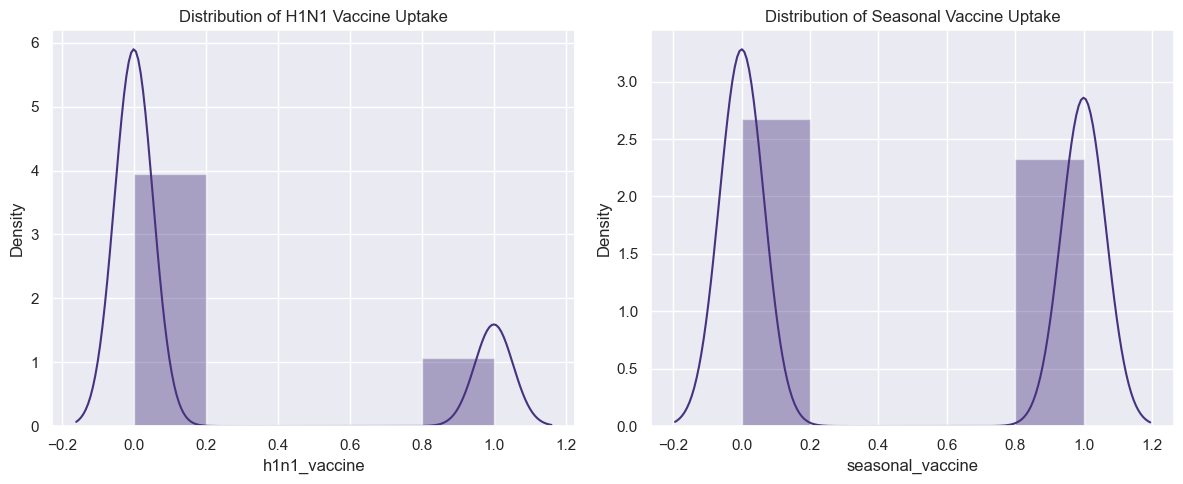

The h1n1_vaccine variable has a skewness of 1.4059428379897505.
The h1n1_vaccine variable has a kurtosis of -0.02332473630532572.
The seasonal_vaccine variable has a skewness of 0.13789351524906218.
The seasonal_vaccine variable has a kurtosis of -1.9809853784522566.


In [45]:
sns.set(rc={'figure.figsize': (12, 6)})
sns.set_palette("viridis")

# Plotting the distribution of both h1n1_vaccine and seasonal_vaccine side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
univariate_plot = sns.distplot(joined_df['h1n1_vaccine'], bins=5, ax=ax[0])
univariate_plot.set_title("Distribution of H1N1 Vaccine Uptake")
univariate_plot2 = sns.distplot(joined_df['seasonal_vaccine'], bins=5, ax=ax[1])
univariate_plot2.set_title("Distribution of Seasonal Vaccine Uptake")
fig.tight_layout()
plt.show()
#fig.savefig('vaccine_uptake_distribution.png')

# Checking for skewness and kurtosis of both variables
print(f"The h1n1_vaccine variable has a skewness of {skew(joined_df['h1n1_vaccine'])}.")
print(f"The h1n1_vaccine variable has a kurtosis of {kurtosis(joined_df['h1n1_vaccine'])}.")
print(f"The seasonal_vaccine variable has a skewness of {skew(joined_df['seasonal_vaccine'])}.")
print(f"The seasonal_vaccine variable has a kurtosis of {kurtosis(joined_df['seasonal_vaccine'])}.")


## 4.1.2 Checking the distribution of Age groups

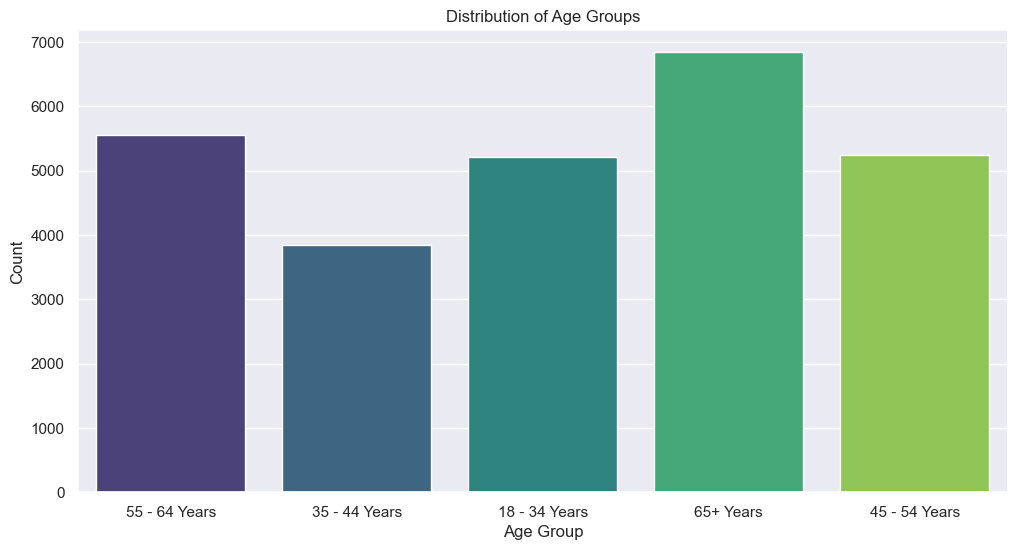

In [46]:
sns.set(rc={'figure.figsize': (12, 6)})
sns.countplot(x='age_group', data=joined_df, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# 4.2 Bivariate Analysis

## 4.2.1 Histograms to visualize the distribution of each column

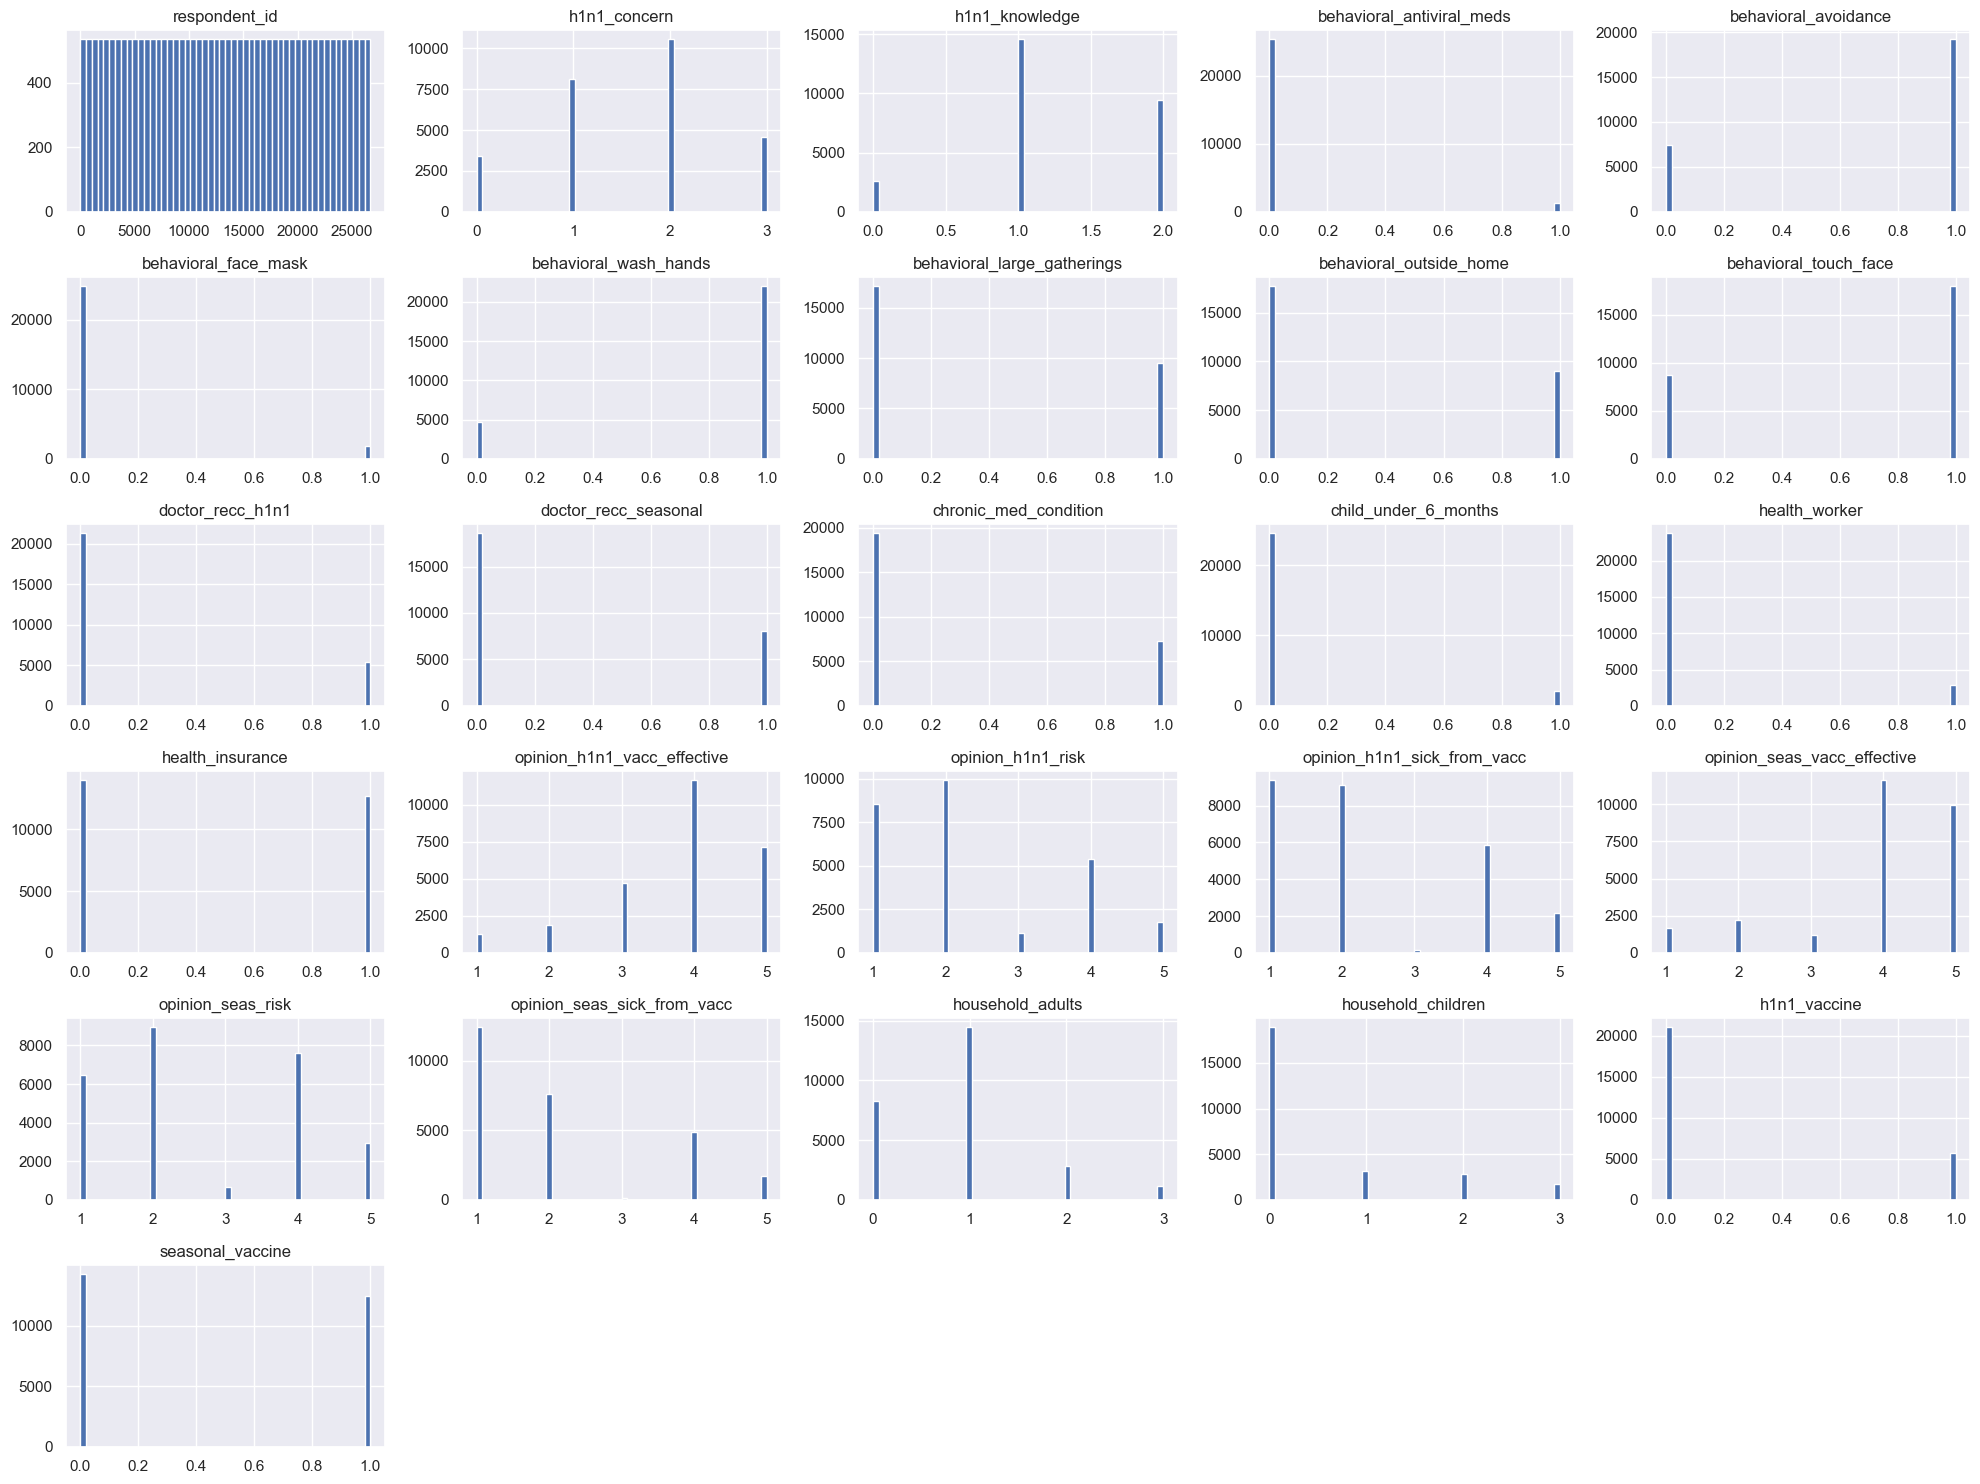

In [47]:
# Plot histograms to visualize the distribution of each column
joined_df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

## 4.2.1 Plotting a correlation heatmap

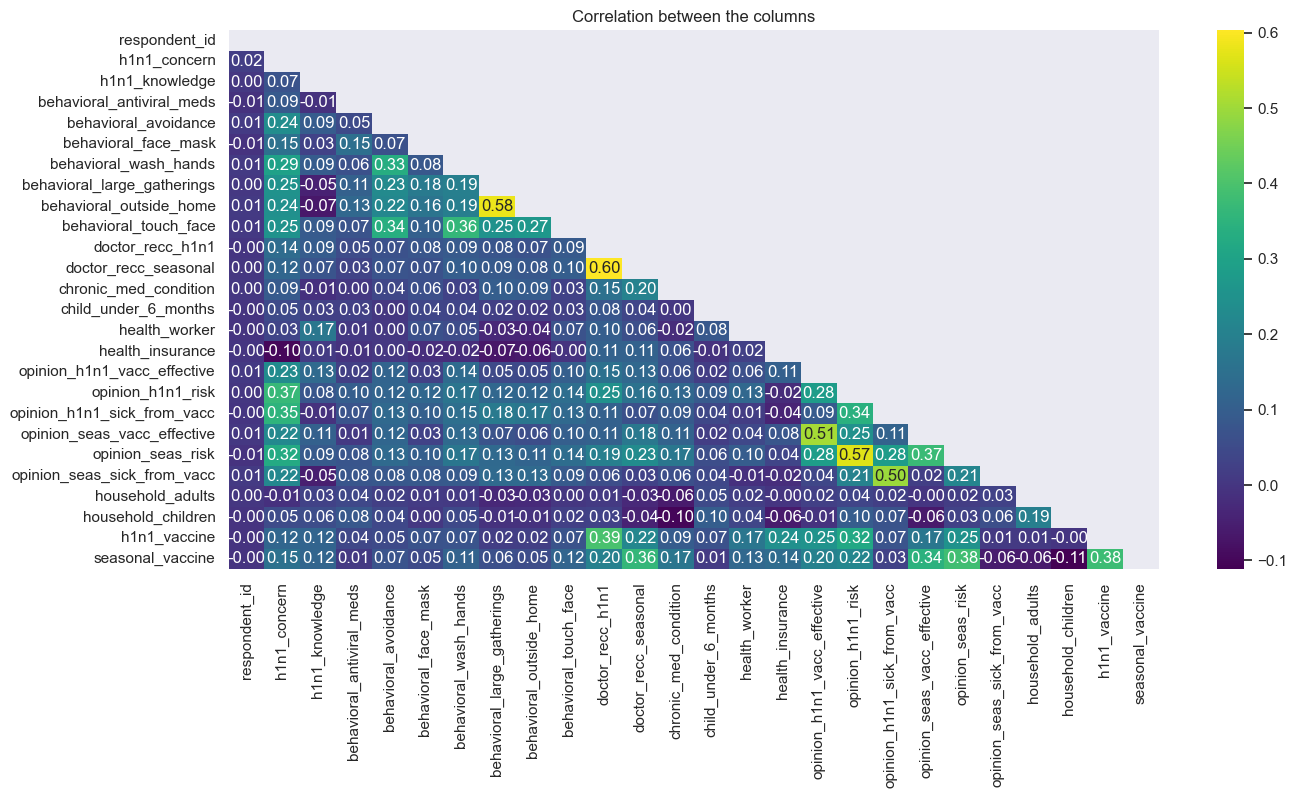

In [48]:
#correlation heatmap 
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(joined_df.corr(), dtype=bool))
sns.heatmap(joined_df.corr(),annot=True,cmap="viridis",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

## 4.2.1 Does age_group  affect the intake of H1N1 vaccine  and seasonal_vaccine?

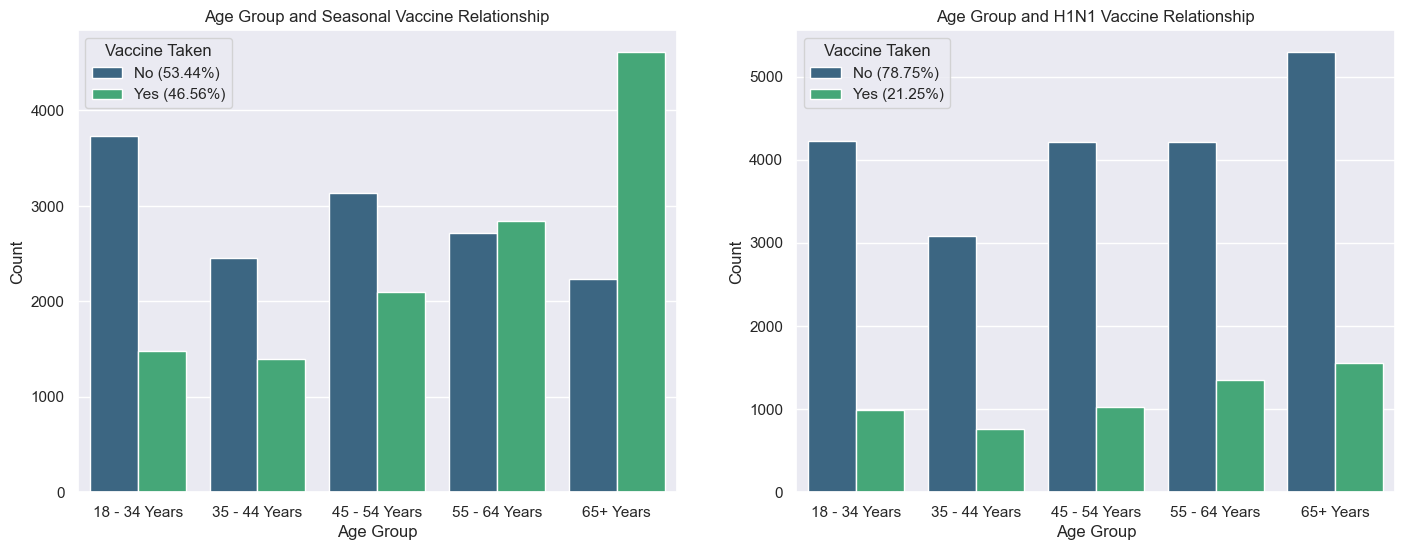

In [49]:
 order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

#Calculating the total number of respondents and proportions of individuals who took the seasonal vaccine
total = len(joined_df)
seasonal_vaccine_counts = joined_df['seasonal_vaccine'].value_counts()
seasonal_vaccine_proportions = seasonal_vaccine_counts / total * 100
seasonal_vaccine_proportions = seasonal_vaccine_proportions.round(2)

#Plotting age group vs seasonal vaccine uptake
sns.countplot(x='age_group', hue='seasonal_vaccine', data=joined_df, palette='viridis', order=order, ax=ax[0])
ax[0].set_title("Age Group and Seasonal Vaccine Relationship")
ax[0].set_xlabel("Age Group")
ax[0].set_ylabel("Count")
ax[0].legend(title='Vaccine Taken', labels=[f'No ({seasonal_vaccine_proportions[0]}%)', f'Yes ({seasonal_vaccine_proportions[1]}%)'])

#Calculating the total number of respondents and proportions of individuals who took the H1N1 vaccine
h1n1_vaccine_counts = joined_df['h1n1_vaccine'].value_counts()
h1n1_vaccine_proportions = h1n1_vaccine_counts / total * 100
h1n1_vaccine_proportions = h1n1_vaccine_proportions.round(2)

#Plotting age group vs H1N1 vaccine uptake
sns.countplot(x='age_group', hue='h1n1_vaccine', data=joined_df, palette='viridis', order=order, ax=ax[1])
ax[1].set_title("Age Group and H1N1 Vaccine Relationship")
ax[1].set_xlabel("Age Group")
ax[1].set_ylabel("Count")
ax[1].legend(title='Vaccine Taken', labels=[f'No ({h1n1_vaccine_proportions[0]}%)', f'Yes ({h1n1_vaccine_proportions[1]}%)'])

plt.show()

## 4.2.2 Does education  affect the in_take of H1N1 vaccine ?

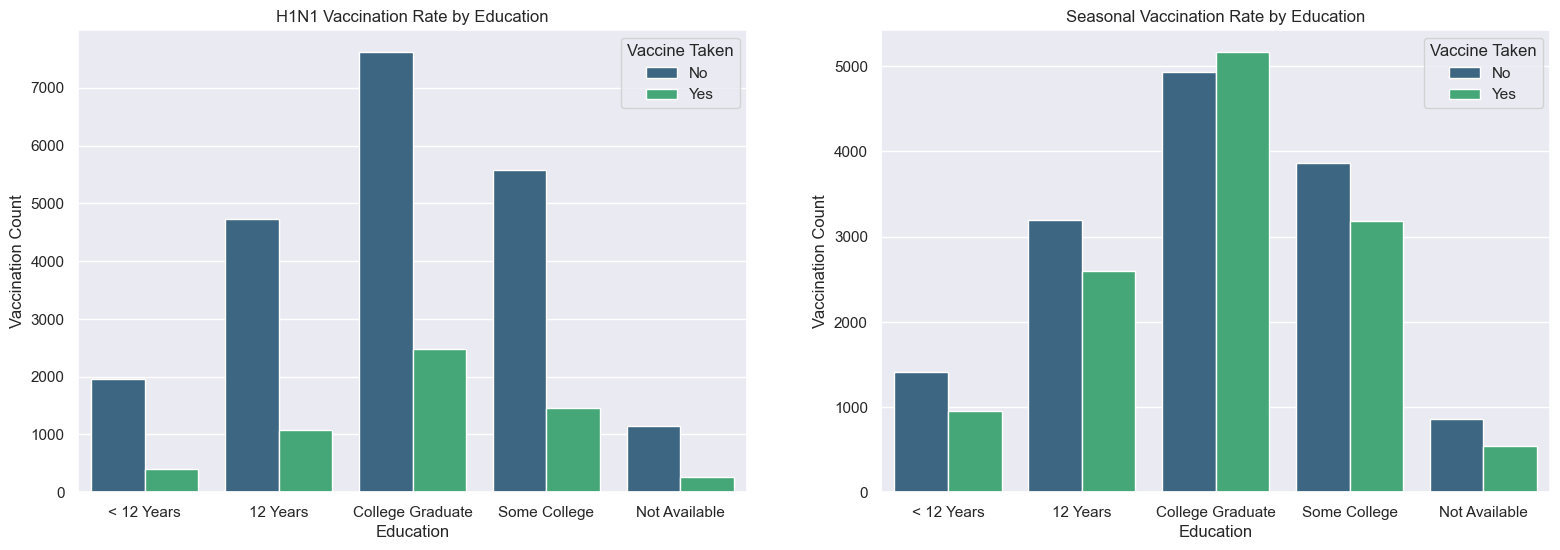

In [50]:
#Bar plot of H1N1 and seasonal vaccination rate by education
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

#Plotting H1N1 vaccination rate by education
sns.countplot(x='education', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Education')
ax[0].set_ylabel('Vaccination Count')
ax[0].set_title('H1N1 Vaccination Rate by Education')
ax[0].legend(title='Vaccine Taken', labels=['No', 'Yes'])

#Plotting seasonal vaccination rate by education
sns.countplot(x='education', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Education')
ax[1].set_ylabel('Vaccination Count')
ax[1].set_title('Seasonal Vaccination Rate by Education')
ax[1].legend(title='Vaccine Taken', labels=['No', 'Yes'])

plt.show()

## 4.2.3 Does Insurance  affect the intake of H1N1 vaccine ?

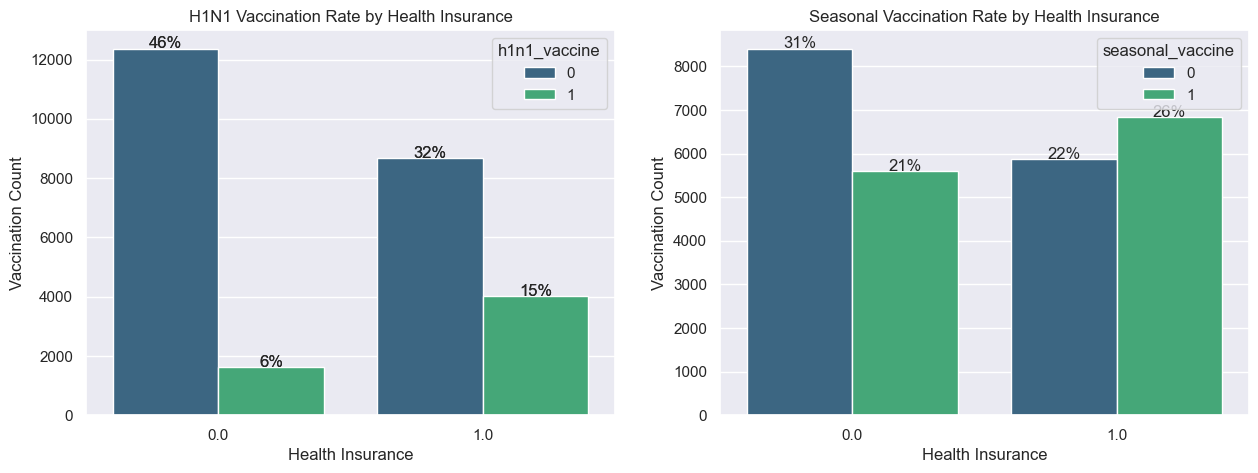

In [51]:
#Bar plot of vaccination rate by insurance with proportions
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='health_insurance', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Health Insurance')
ax[0].set_ylabel('Vaccination Count')
ax[0].set_title('H1N1 Vaccination Rate by Health Insurance')
for i in range(2):
    for j in ax[i].patches:
        height = j.get_height()
        ax[i].text(j.get_x()+j.get_width()/2,
                   height + 10,'{:1.0f}%'.format(height/len(joined_df)*100),ha="center", fontsize=12)

sns.countplot(x='health_insurance', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Health Insurance')
ax[1].set_ylabel('Vaccination Count')
ax[1].set_title('Seasonal Vaccination Rate by Health Insurance')
for i in range(2):
    for j in ax[i].patches:
        height = j.get_height()
        ax[i].text(j.get_x()+j.get_width()/2,
                   height + 10,
                   '{:1.0f}%'.format(height/len(joined_df)*100),ha="center", fontsize=12)

plt.show()

## 4.2.4 Does a region  affect the intake of H1N1 vaccine and seasonal_vaccine ?

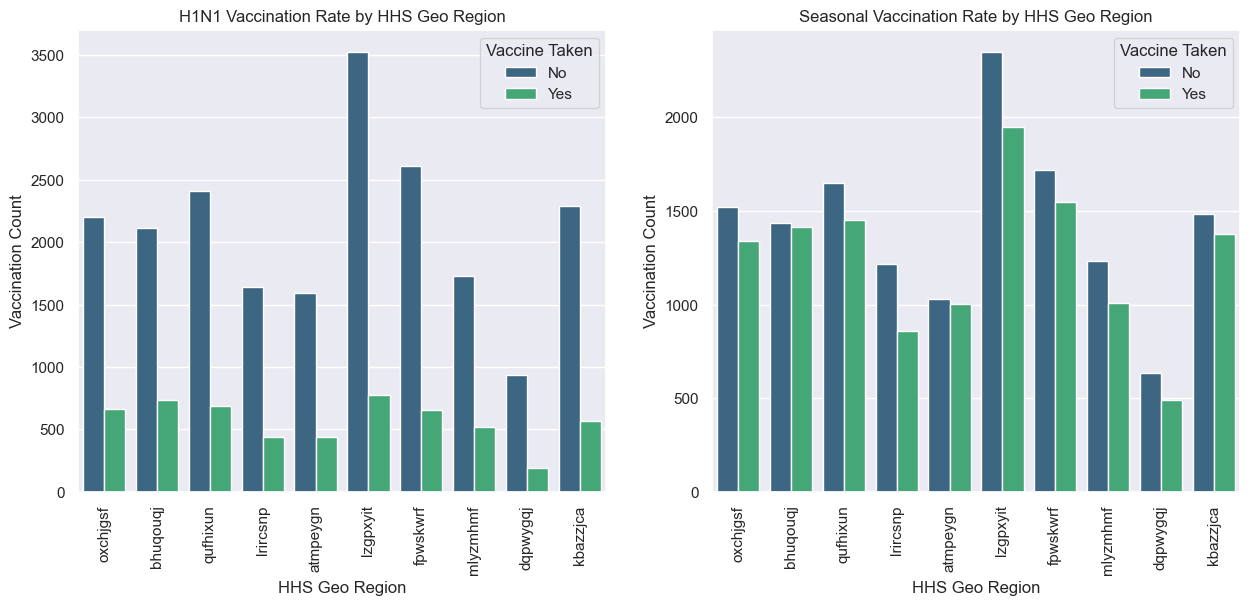

In [52]:
#Bar plot of vaccination rate by hhs_geo_region
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#Plotting hhs_geo_region vs H1N1 vaccine uptake
sns.countplot(x='hhs_geo_region', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('HHS Geo Region')
ax[0].set_ylabel('Vaccination Count')
ax[0].set_title('H1N1 Vaccination Rate by HHS Geo Region')
ax[0].legend(title='Vaccine Taken', labels=['No', 'Yes'])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

#Plotting hhs_geo_region vs seasonal vaccine uptake
sns.countplot(x='hhs_geo_region', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('HHS Geo Region')
ax[1].set_ylabel('Vaccination Count')
ax[1].set_title('Seasonal Vaccination Rate by HHS Geo Region')
ax[1].legend(title='Vaccine Taken', labels=['No', 'Yes'])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

# 4.2.5 Does  Race  affect the intake of H1N1 vaccine  and seasonal_vaccine ?

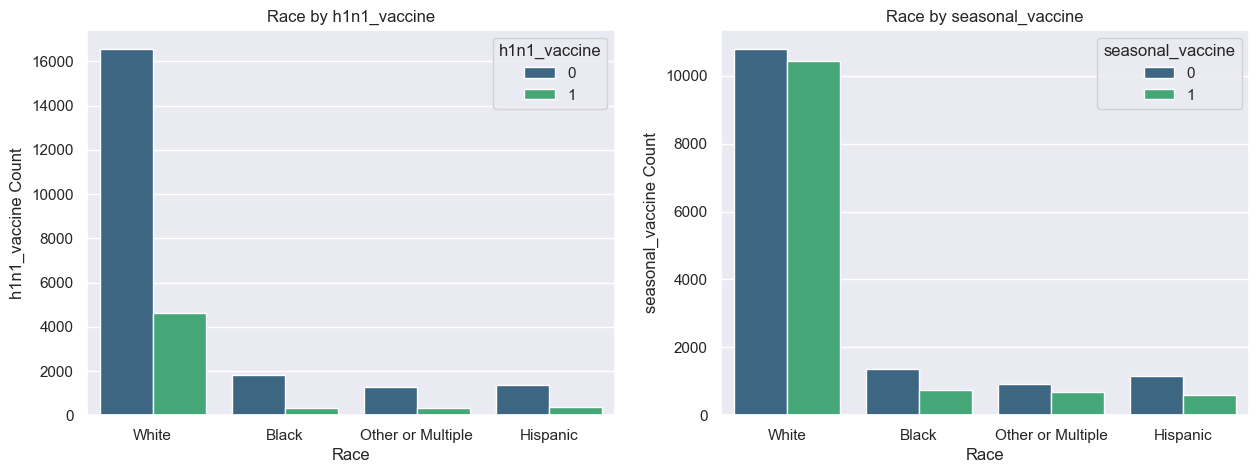

In [53]:
#Plotting distribution of race and h1n1/seasonal_vaccine
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#Plotting count of h1n1_vaccine for each race
sns.countplot(x='race', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Race')
ax[0].set_ylabel('h1n1_vaccine Count')
ax[0].set_title('Race by h1n1_vaccine')

#Plotting count of seasonal_vaccine for each race
sns.countplot(x='race', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Race')
ax[1].set_ylabel('seasonal_vaccine Count')
ax[1].set_title('Race by seasonal_vaccine')

plt.show()

# 4.2.5 Does  employment_status  affect the intake of H1N1 vaccine ?

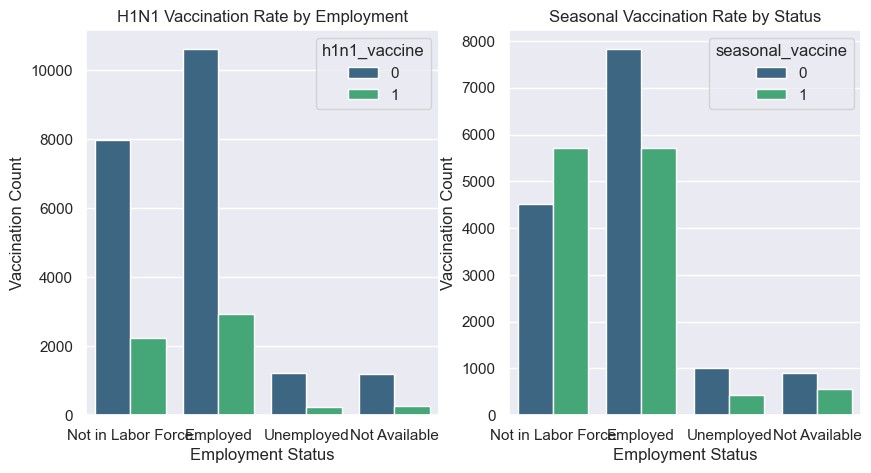

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plotting distribution of employment_status and h1n1_vaccine
sns.countplot(x='employment_status', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Employment Status')
ax[0].set_ylabel('Vaccination Count')
ax[0].set_title('H1N1 Vaccination Rate by Employment')

# Plotting distribution of employment_status and seasonal_vaccine
sns.countplot(x='employment_status', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Employment Status')
ax[1].set_ylabel('Vaccination Count')
ax[1].set_title('Seasonal Vaccination Rate by Status')

plt.show()


# 5. Model Selection and Training

## Splitting of the data

In [53]:
# Import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

# Split the training set and training labels into training and testing data
# Use 42 as the random state for reproducibility
# Reserve 30% of the data for testing and use the rest for training
X_train, X_test, y_train, y_test = train_test_split(training_set, training_label, random_state=42, test_size=0.3)


In [54]:
#checking the data types of the training features dataset
training_set.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [55]:
# Obtain a list of all the columns in the dataframe
all_cols = training_set.columns

# Filter out the columns which contain numeric values using the select_dtypes method
num_cols = training_set.select_dtypes(exclude='object').columns

# Store the filtered numeric columns in a variable called 'num_cols'
num_col = num_cols.values

# Print the list of numeric columns
print("List of Numeric Columns:")
print(num_col)


List of Numeric Columns:
['respondent_id' 'h1n1_concern' 'h1n1_knowledge'
 'behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'doctor_recc_h1n1'
 'doctor_recc_seasonal' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'health_insurance' 'opinion_h1n1_vacc_effective'
 'opinion_h1n1_risk' 'opinion_h1n1_sick_from_vacc'
 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children']


In [56]:
#Obtain the list of columns in the dataframe
all_cols = training_set.columns

#Filter out the columns that contain non-numeric data using the select_dtypes method
non_numeric_cols = training_set.select_dtypes(include='object').columns

#Store the filtered non-numeric columns in a variable named 'non_numeric_col'
non_numeric_col = non_numeric_cols.values

#Print the list of non-numeric columns
print("List of Non-Numeric Columns:")
print(non_numeric_col)

List of Non-Numeric Columns:
['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [57]:
#Importing the StandardScaler module from the sklearn library
from sklearn.preprocessing import StandardScaler

#Storing the non-numeric columns in a variable
non_numeric_cols = X_train[non_numeric_col]

#Storing the numeric columns in a variable
num_cols = X_train[num_col]

#Scaling the numeric columns using StandardScaler
num_cols = StandardScaler().fit_transform(num_cols)
pd.DataFrame(num_cols)

0         1         2         3         4         5         6   \
0     -1.041146  0.420941  1.192119 -0.226338 -1.596010 -0.273835  0.466914   
1     -1.377771  0.420941 -0.417057 -0.226338  0.626562 -0.273835  0.466914   
2     -0.875035  1.518593 -0.417057 -0.226338  0.626562 -0.273835  0.466914   
3      1.193521 -0.676711  1.192119 -0.226338 -1.596010 -0.273835 -2.141721   
4     -1.425028 -1.774364  1.192119 -0.226338  0.626562 -0.273835  0.466914   
...         ...       ...       ...       ...       ...       ...       ...   
18689  1.065604  0.420941 -0.417057 -0.226338 -1.596010 -0.273835  0.466914   
18690 -1.029882 -0.676711 -0.417057 -0.226338 -1.596010 -0.273835  0.466914   
18691 -1.616386  0.420941 -0.417057 -0.226338  0.626562 -0.273835 -2.141721   
18692  0.317262  0.420941 -0.417057 -0.226338  0.626562 -0.273835  0.466914   
18693  1.334774  1.518593 -0.417057 -0.226338 -1.596010 -0.273835  0.466914   

             7         8         9   ...        14        15        16  \
0     -0.743757 -0.713471 -1.426271  ... -0.352009 -0.948474  0.183283   
1      1.344526 -0.713471  0.701129  ... -0.352009 -0.948474  0.183283   
2     -0.743757 -0.713471  0.701129  ...  2.840837  1.054325  0.183283   
3     -0.743757 -0.713471 -1.426271  ...  2.840837  1.054325  1.127684   
4      1.344526  1.401598  0.701129  ... -0.352009  1.054325  1.127684   
...         ...       ...       ...  ...       ...       ...       ...   
18689 -0.743757 -0.713471  0.701129  ... -0.352009  1.054325  0.183283   
18690 -0.743757 -0.713471  0.701129  ... -0.352009 -0.948474  0.183283   
18691 -0.743757 -0.713471  0.701129  ... -0.352009 -0.948474  0.183283   
18692 -0.743757 -0.713471  0.701129  ...  2.840837  1.054325 -2.649921   
18693 -0.743757  1.401598  0.701129  ... -0.352009  1.054325  0.183283   

             17        18        19        20        21        22        23  
0     -1.033346 -0.254705  0.894464 -0.498624 -0.073125  0.163581 -0.573022  
1     -0.257049  1.209230 -1.734504  1.656253 -0.824221  0.163581 -0.573022  
2     -0.257049  1.209230  0.894464  0.937960  2.180165  1.496035 -0.573022  
3     -0.257049  1.209230  0.894464 -0.498624  1.429068  0.163581  1.584277  
4      1.295544  1.209230  0.894464  0.937960 -0.824221 -1.168874 -0.573022  
...         ...       ...       ...       ...       ...       ...       ...  
18689 -0.257049 -0.254705  0.018141 -0.498624 -0.824221 -1.168874 -0.573022  
18690 -0.257049 -0.986672  0.018141 -0.498624  1.429068 -1.168874 -0.573022  
18691 -0.257049 -0.254705  0.018141 -0.498624 -0.073125  0.163581 -0.573022  
18692 -1.033346  1.209230 -2.610827 -1.216916  1.429068  0.163581 -0.573022  
18693 -0.257049  1.209230  0.894464 -0.498624 -0.073125 -1.168874 -0.573022  

[18694 rows x 24 columns]

In [58]:
#Encoding the non-numeric data
from sklearn.preprocessing import OrdinalEncoder

#Initialize the ordinal encoder
encoder = OrdinalEncoder()

#Fit the encoder on the non-numeric columns in the training data
non_numeric_cols = X_train[non_numeric_col]
non_numeric_cols = encoder.fit_transform(non_numeric_cols)

#Display the encoded columns
pd.DataFrame(non_numeric_cols)

0    1    2    3    4    5    6    7    8    9     10    11
0      4.0  2.0  3.0  1.0  1.0  0.0  1.0  2.0  0.0  1.0   0.0   0.0
1      0.0  0.0  1.0  1.0  2.0  2.0  2.0  0.0  8.0  1.0   5.0  11.0
2      2.0  2.0  3.0  0.0  1.0  2.0  2.0  0.0  3.0  0.0   5.0   1.0
3      0.0  2.0  3.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  13.0   3.0
4      4.0  2.0  3.0  1.0  0.0  2.0  1.0  2.0  4.0  0.0   0.0   0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...
18689  3.0  4.0  3.0  1.0  1.0  2.0  1.0  2.0  9.0  1.0   0.0   0.0
18690  3.0  4.0  3.0  1.0  0.0  2.0  1.0  3.0  7.0  1.0   0.0   0.0
18691  3.0  0.0  3.0  0.0  0.0  0.0  1.0  0.0  9.0  2.0   2.0  21.0
18692  1.0  2.0  0.0  0.0  1.0  0.0  1.0  0.0  4.0  1.0   5.0   3.0
18693  0.0  0.0  0.0  1.0  0.0  2.0  2.0  0.0  3.0  0.0  13.0  18.0

[18694 rows x 12 columns]

In [59]:
#Re-assigning the non-numeric and scaled numeric columns to X_train
X_train[non_numeric_col] = non_numeric_cols
X_train[num_col] = num_cols

#Printing the first 5 rows of X_train after scaling the numeric columns
X_train.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
5303       -1.041146      0.420941        1.192119                  -0.226338   
2703       -1.377771      0.420941       -0.417057                  -0.226338   
6586       -0.875035      1.518593       -0.417057                  -0.226338   
22563       1.193521     -0.676711        1.192119                  -0.226338   
2338       -1.425028     -1.774364        1.192119                  -0.226338   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
5303              -1.596010             -0.273835               0.466914   
2703               0.626562             -0.273835               0.466914   
6586               0.626562             -0.273835               0.466914   
22563             -1.596010             -0.273835              -2.141721   
2338               0.626562             -0.273835               0.466914   

       behavioral_large_gatherings  behavioral_outside_home  \
5303                     -0.743757                -0.713471   
2703                      1.344526                -0.713471   
6586                     -0.743757                -0.713471   
22563                    -0.743757                -0.713471   
2338                      1.344526                 1.401598   

       behavioral_touch_face  ...  income_poverty  marital_status  \
5303               -1.426271  ...             1.0             0.0   
2703                0.701129  ...             2.0             2.0   
6586                0.701129  ...             1.0             2.0   
22563              -1.426271  ...             1.0             0.0   
2338                0.701129  ...             0.0             2.0   

       rent_or_own  employment_status  hhs_geo_region  census_msa  \
5303           1.0                2.0             0.0         1.0   
2703           2.0                0.0             8.0         1.0   
6586           2.0                0.0             3.0         0.0   
22563          1.0                0.0             0.0         1.0   
2338           1.0                2.0             4.0         0.0   

       household_adults  household_children  employment_industry  \
5303           0.163581           -0.573022                  0.0   
2703           0.163581           -0.573022                  5.0   
6586           1.496035           -0.573022                  5.0   
22563          0.163581            1.584277                 13.0   
2338          -1.168874           -0.573022                  0.0   

       employment_occupation  
5303                     0.0  
2703                    11.0  
6586                     1.0  
22563                    3.0  
2338                     0.0  

[5 rows x 36 columns]

In [60]:
# Fit and transform the numeric columns in the test set
scaled_numeric_cols_test = StandardScaler().fit_transform(X_test[num_col])

# Print the transformed numeric columns in the test set
for row in scaled_numeric_cols_test:
    print(row)

[ 0.3125444   0.43001437 -0.40368652 -0.22618789  0.61692754  3.73119119
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -2.6750923  -1.01779807
 -0.97026108 -2.55042793 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[-0.51659653  1.51733061 -2.00504301 -0.22618789  0.61692754  3.73119119
  0.44932161  1.33177479  1.41262664 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -2.6750923  -1.01779807
 -0.97026108 -2.55042793 -1.19872592 -0.82534906  0.15623056  0.51494593]
[ 0.40933179 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183  1.54722361
 -0.60633285 -0.29612217 -0.34175199  1.04141603  0.17499607 -0.23743103
 -0.23150186  0.03408168  0.95833467 -0.82534906 -1.15189427  0.51494593]
[ 1.30008838  0.43001437  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529

[ 0.36191509 -1.7446181  -0.40368652 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -2.6750923  -1.01779807
  1.98477579  0.03408168 -1.19872592 -0.82534906  0.15623056  0.51494593]
[ 0.00837408 -0.65730187 -2.00504301 -0.22618789  0.61692754 -0.26801092
 -2.22557737 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603  0.17499607 -0.23743103
 -0.23150186 -1.68892472 -0.47970573 -0.06925874  2.77248022 -0.57091242]
[ 0.54819498  0.43001437  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113 -1.46578529  2.00988125 -0.64631899
  1.64925914 -0.29612217 -0.34175199 -0.96023104 -0.77503339  1.32330305
  1.24601658  0.03408168  0.95833467  1.4429219   0.15623056 -0.57091242]
[ 0.17276935  0.43001437 -0.40368652 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529

[ 0.69344119 -0.65730187  1.19766996 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607 -1.01779807
 -0.97026108  0.03408168 -1.19872592 -0.82534906  2.77248022  1.60080428]
[-1.07048612 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603 -0.77503339 -1.01779807
 -0.23150186 -0.82742152 -1.19872592 -0.82534906  0.15623056 -0.57091242]
[-1.48681517 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603 -1.72506285 -1.01779807
 -0.23150186  0.03408168 -1.19872592 -0.06925874  0.15623056 -0.57091242]
[-0.52363087 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816

[ 1.7028698  -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
 -2.22557737 -0.75087771 -0.70790113  0.68222816 -0.49754183  1.54722361
 -0.60633285 -0.29612217 -0.34175199  1.04141603  1.12502552 -1.01779807
 -0.97026108  0.89558488 -1.19872592 -0.82534906  0.15623056 -0.57091242]
[ 0.72040619  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771  1.41262664  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607 -0.23743103
 -0.23150186  0.03408168 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[-1.01238763  0.43001437 -0.40368652 -0.22618789 -1.62093591 -0.26801092
 -2.22557737 -0.75087771 -0.70790113 -1.46578529  2.00988125 -0.64631899
  1.64925914 -0.29612217 -0.34175199  1.04141603  0.17499607  1.32330305
 -0.23150186  0.03408168  0.95833467 -0.06925874  0.15623056 -0.57091242]
[ 0.93860117  1.51733061 -2.00504301 -0.22618789 -1.62093591 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816

[ 0.87516179  1.51733061 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603 -0.77503339 -1.01779807
 -0.97026108  0.03408168 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[-0.53053495  0.43001437 -0.40368652 -0.22618789  0.61692754  3.73119119
  0.44932161  1.33177479  1.41262664 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607  1.32330305
  1.98477579  0.89558488  0.95833467  1.4429219   1.46435539 -0.57091242]
[ 0.9047321  -1.7446181  -0.40368652  4.42110324  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603  0.17499607 -1.01779807
 -0.97026108  0.03408168 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[-1.70982998  0.43001437  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816

[ 1.25110849 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607 -0.23743103
 -0.23150186  0.03408168 -0.47970573 -0.06925874 -1.15189427 -0.57091242]
[-0.59840336 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607 -0.23743103
 -0.23150186  0.03408168  0.95833467 -0.82534906  0.15623056 -0.57091242]
[ 0.42313995 -1.7446181  -0.40368652 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217  2.92609851  1.04141603  0.17499607 -1.01779807
 -0.97026108  0.03408168 -1.19872592 -0.82534906  1.46435539 -0.57091242]
[-0.38489795  0.43001437  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816

[ 1.36352775 -0.65730187  1.19766996 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
  1.64925914  3.37698457  2.92609851 -0.96023104 -1.72506285 -0.23743103
 -0.97026108 -1.68892472 -0.47970573 -0.06925874  0.15623056 -0.57091242]
[-1.48043215  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816  2.00988125  1.54722361
  1.64925914 -0.29612217 -0.34175199 -0.96023104  1.12502552 -0.23743103
 -0.23150186  0.89558488 -0.47970573 -0.06925874  0.15623056 -0.57091242]
[-0.71381874  1.51733061 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183  1.54722361
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607 -1.01779807
 -0.97026108  0.89558488  0.95833467 -0.82534906  0.15623056 -0.57091242]
[ 1.34750508  1.51733061 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816

[-1.07556648  0.43001437 -0.40368652  4.42110324  0.61692754  3.73119119
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -0.77503339  0.54293601
  1.24601658 -1.68892472  0.95833467 -0.06925874  0.15623056 -0.57091242]
[ 0.7142837   0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  1.12502552 -0.23743103
 -0.97026108  0.89558488  0.95833467 -0.82534906 -1.15189427 -0.57091242]
[-0.72489132 -0.65730187  1.19766996 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607  1.32330305
 -0.23150186  0.03408168  0.95833467 -0.82534906  1.46435539 -0.57091242]
[-1.61564791 -1.7446181  -0.40368652 -0.22618789 -1.62093591 -0.26801092
 -2.22557737 -0.75087771 -0.70790113 -1.46578529

[-1.00300851  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771  1.41262664  0.68222816 -0.49754183 -0.64631899
 -0.60633285  3.37698457 -0.34175199 -0.96023104 -1.72506285 -1.01779807
 -0.97026108  0.03408168 -1.19872592 -0.82534906  1.46435539  0.51494593]
[ 1.24094777 -0.65730187 -0.40368652 -0.22618789 -1.62093591 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183  1.54722361
  1.64925914 -0.29612217 -0.34175199  1.04141603 -0.77503339 -1.01779807
 -0.97026108  0.89558488 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[-0.47360886 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  1.12502552 -1.01779807
 -0.23150186  0.03408168 -1.19872592 -0.82534906  1.46435539 -0.57091242]
[ 1.16474236  1.51733061 -2.00504301 -0.22618789 -1.62093591 -0.26801092
 -2.22557737 -0.75087771 -0.70790113  0.68222816

[ 0.24662998 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771  1.41262664  0.68222816 -0.49754183  1.54722361
  1.64925914 -0.29612217 -0.34175199  1.04141603  1.12502552  1.32330305
  1.24601658  0.89558488 -1.19872592 -0.06925874 -1.15189427 -0.57091242]
[-0.57534634 -0.65730187 -2.00504301 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
  1.64925914 -0.29612217 -0.34175199  1.04141603  0.17499607  1.32330305
 -0.23150186  0.03408168  0.95833467 -0.06925874  0.15623056 -0.57091242]
[ 1.64242653  0.43001437  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  1.12502552 -0.23743103
 -0.23150186  0.03408168  0.95833467 -0.82534906 -1.15189427 -0.57091242]
[-1.22367854  1.51733061  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771  1.41262664 -1.46578529

[ 0.64081387  1.51733061  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816  2.00988125  1.54722361
 -0.60633285 -0.29612217  2.92609851 -0.96023104  1.12502552 -0.23743103
 -0.97026108  0.89558488 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[-0.92055034  0.43001437 -0.40368652 -0.22618789  0.61692754  3.73119119
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183 -0.64631899
  1.64925914 -0.29612217 -0.34175199  1.04141603  0.17499607 -0.23743103
 -0.23150186  0.89558488  0.95833467 -0.82534906 -1.15189427 -0.57091242]
[ 1.44181742  1.51733061 -0.40368652  4.42110324  0.61692754  3.73119119
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183  1.54722361
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  1.12502552  2.1036701
  1.98477579  0.03408168  0.95833467  1.4429219   0.15623056  2.68666263]
[ 0.42809004 -1.7446181  -2.00504301 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 

[-0.07603806  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
  1.64925914  3.37698457 -0.34175199 -0.96023104  0.17499607  1.32330305
  1.24601658  0.89558488  0.95833467 -0.06925874  0.15623056 -0.57091242]
[ 0.86682479  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
 -2.22557737 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603 -1.72506285  1.32330305
  1.24601658  0.03408168  0.95833467 -0.82534906 -1.15189427 -0.57091242]
[ 1.24733078  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183  1.54722361
 -0.60633285 -0.29612217 -0.34175199  1.04141603  0.17499607 -0.23743103
 -0.23150186  0.03408168 -0.47970573  1.4429219   0.15623056 -0.57091242]
[-0.25332963  1.51733061  1.19766996 -0.22618789  0.61692754  3.73119119
  0.44932161 -0.75087771 -0.70790113  0.68222816

[ 0.6630893  -1.7446181  -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603 -0.77503339 -1.01779807
 -0.23150186  0.03408168 -1.19872592 -0.06925874  0.15623056  0.51494593]
[ 0.07520037 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183  1.54722361
  1.64925914 -0.29612217  2.92609851  1.04141603  0.17499607 -0.23743103
 -0.23150186  0.03408168  0.95833467 -0.82534906  0.15623056  1.60080428]
[ 0.71532583 -1.7446181  -2.00504301 -0.22618789 -1.62093591 -0.26801092
 -2.22557737 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -2.6750923  -1.01779807
 -0.97026108 -2.55042793 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[ 0.66400116  0.43001437 -0.40368652 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771  1.41262664  0.68222816

[ 1.18792964 -0.65730187  1.19766996 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
  1.64925914 -0.29612217 -0.34175199  1.04141603  0.17499607 -1.01779807
 -0.97026108  0.03408168 -0.47970573 -0.82534906 -1.15189427 -0.57091242]
[-0.50396076  1.51733061  1.19766996 -0.22618789 -1.62093591 -0.26801092
  0.44932161  1.33177479  1.41262664 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603  0.17499607 -0.23743103
 -0.97026108  0.03408168  0.95833467 -0.06925874  0.15623056 -0.57091242]
[-0.46970089 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664 -1.46578529 -0.49754183 -0.64631899
 -0.60633285  3.37698457 -0.34175199 -0.96023104  0.17499607  1.32330305
 -0.23150186  0.89558488  0.95833467 -0.06925874  0.15623056  0.51494593]
[ 0.35761632  0.43001437 -0.40368652 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816

[ 0.72483522  1.51733061  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  1.12502552  1.32330305
 -0.97026108  0.89558488  0.95833467  1.4429219   0.15623056  1.60080428]
[-1.56771015  0.43001437 -0.40368652 -0.22618789 -1.62093591 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816  2.00988125  1.54722361
  1.64925914 -0.29612217 -0.34175199  1.04141603  1.12502552 -0.23743103
  1.24601658  0.03408168 -0.47970573 -0.82534906 -1.15189427 -0.57091242]
[ 1.32483885  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607 -1.01779807
 -0.23150186  0.89558488  0.95833467 -0.06925874 -1.15189427 -0.57091242]
[ 0.60030125  1.51733061  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816

[ 1.61533128  0.43001437 -0.40368652 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603  0.17499607 -0.23743103
  1.24601658  0.89558488 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[-1.22615358  0.43001437 -2.00504301 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -0.77503339  1.32330305
  1.24601658 -1.68892472  0.95833467  1.4429219   0.15623056  0.51494593]
[-1.3103052   0.43001437  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -1.72506285 -1.01779807
 -0.97026108 -2.55042793 -1.19872592 -0.82534906  0.15623056  1.60080428]
[-0.22206587 -0.65730187  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113 -1.46578529

[ 0.62609385 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603 -0.77503339 -1.01779807
 -0.97026108  0.03408168 -0.47970573 -0.82534906  0.15623056 -0.57091242]
[-1.31720928 -1.7446181  -2.00504301 -0.22618789  0.61692754 -0.26801092
 -2.22557737  1.33177479 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -1.72506285 -1.01779807
 -0.97026108 -2.55042793 -0.47970573 -0.82534906  2.77248022  1.60080428]
[ 1.09518049 -0.65730187 -0.40368652 -0.22618789  0.61692754 -0.26801092
 -2.22557737 -0.75087771 -0.70790113 -1.46578529 -0.49754183  1.54722361
  1.64925914 -0.29612217 -0.34175199  1.04141603 -0.77503339 -1.01779807
 -0.97026108  0.03408168 -1.19872592 -0.82534906  0.15623056 -0.57091242]
[-0.66887709 -0.65730187  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771  1.41262664  0.68222816

[-0.18194405 -1.7446181  -2.00504301 -0.22618789 -1.62093591 -0.26801092
 -2.22557737  1.33177479 -0.70790113  0.68222816 -0.49754183 -0.64631899
  1.64925914 -0.29612217 -0.34175199 -0.96023104 -0.77503339 -1.01779807
  0.50725736 -0.82742152 -1.19872592 -0.82534906 -1.15189427 -0.57091242]
[ 1.30308449  1.51733061  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607  2.1036701
  1.24601658  0.89558488  1.67735487 -0.06925874  1.46435539  0.51494593]
[-0.11394537 -0.65730187 -2.00504301 -0.22618789 -1.62093591 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603  0.17499607 -0.23743103
 -0.23150186  0.03408168 -0.47970573 -0.06925874 -1.15189427 -0.57091242]
[-0.82089711  1.51733061 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816 

[ 0.39786841 -0.65730187  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -0.77503339 -1.01779807
 -0.97026108  0.03408168  0.95833467 -0.06925874 -1.15189427 -0.57091242]
[ 0.98106777 -1.7446181  -2.00504301 -0.22618789 -1.62093591  3.73119119
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603 -0.77503339  1.32330305
 -0.23150186  0.89558488 -1.19872592 -0.06925874  0.15623056 -0.57091242]
[ 0.37233634 -1.7446181   1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -2.6750923   1.32330305
 -0.23150186 -0.82742152 -0.47970573  2.19901222  0.15623056 -0.57091242]
[ 0.4164964  -0.65730187  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816

[ 0.79999851  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183  1.54722361
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -2.6750923  -0.23743103
  1.24601658  0.03408168  1.67735487  1.4429219  -1.15189427  0.51494593]
[-0.73570337 -1.7446181   1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816  2.00988125  1.54722361
 -0.60633285 -0.29612217 -0.34175199  1.04141603  1.12502552  1.32330305
 -0.97026108  0.89558488  1.67735487 -0.82534906 -1.15189427 -0.57091242]
[ 1.13777736  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183  1.54722361
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  0.17499607  0.54293601
 -0.97026108  0.89558488  0.95833467 -0.82534906  0.15623056 -0.57091242]
[-1.66593046 -0.65730187  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529

[ 0.69734916  1.51733061  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183 -0.64631899
  1.64925914 -0.29612217 -0.34175199 -0.96023104  0.17499607  1.32330305
 -0.23150186  0.89558488  0.95833467 -0.82534906  0.15623056 -0.57091242]
[ 0.91893105 -0.65730187 -2.00504301 -0.22618789 -1.62093591 -0.26801092
 -2.22557737 -0.75087771 -0.70790113 -1.46578529 -0.49754183  1.54722361
 -0.60633285 -0.29612217 -0.34175199  1.04141603  0.17499607 -1.01779807
 -0.23150186  0.03408168 -0.47970573 -0.82534906 -1.15189427 -0.57091242]
[ 0.86630373 -0.65730187 -2.00504301 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
  1.64925914 -0.29612217 -0.34175199  1.04141603 -0.77503339 -0.23743103
 -0.23150186 -0.82742152 -0.47970573 -0.06925874 -1.15189427 -0.57091242]
[ 0.02087959  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816

[-1.275394   -0.65730187  1.19766996 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  1.12502552  1.32330305
 -0.23150186  0.03408168  0.95833467  1.4429219  -1.15189427 -0.57091242]
[ 0.39812894  1.51733061 -2.00504301 -0.22618789  0.61692754 -0.26801092
  0.44932161 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104 -2.6750923  -1.01779807
  1.98477579 -1.68892472 -1.19872592 -0.82534906  1.46435539 -0.57091242]
[-1.29467332 -1.7446181  -0.40368652 -0.22618789 -1.62093591 -0.26801092
 -2.22557737 -0.75087771 -0.70790113 -1.46578529 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199 -0.96023104  1.12502552 -1.01779807
 -0.97026108  0.89558488 -0.47970573 -0.82534906  0.15623056 -0.57091242]
[ 1.42579474  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816

[ 1.15197632 -1.7446181  -2.00504301 -0.22618789 -1.62093591 -0.26801092
  0.44932161  1.33177479 -0.70790113  0.68222816 -0.49754183 -0.64631899
 -0.60633285 -0.29612217 -0.34175199  1.04141603  1.12502552 -1.01779807
 -0.23150186  0.03408168 -1.19872592  1.4429219  -1.15189427 -0.57091242]
[ 0.87216568  0.43001437 -0.40368652 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664  0.68222816 -0.49754183 -0.64631899
  1.64925914 -0.29612217 -0.34175199 -0.96023104  0.17499607  1.32330305
  1.24601658  0.03408168  0.95833467 -0.06925874  0.15623056 -0.57091242]
[ 1.35154331  0.43001437 -2.00504301 -0.22618789  0.61692754 -0.26801092
  0.44932161  1.33177479  1.41262664 -1.46578529 -0.49754183 -0.64631899
  1.64925914 -0.29612217 -0.34175199 -0.96023104  1.12502552 -0.23743103
 -0.23150186 -2.55042793  1.67735487 -0.82534906  0.15623056  0.51494593]
[ 0.48749118  0.43001437  1.19766996 -0.22618789  0.61692754  3.73119119
  0.44932161  1.33177479  1.41262664  0.68222816

In [61]:
scaled_non_numeric_cols_test = encoder.fit_transform(X_test[non_numeric_col])
scaled_non_numeric_cols_test

array([[ 0.,  3.,  3., ...,  1.,  0.,  0.],
       [ 1.,  3.,  3., ...,  1.,  0.,  0.],
       [ 2.,  2.,  3., ...,  0.,  9., 11.],
       ...,
       [ 0.,  1.,  3., ...,  1.,  0.,  0.],
       [ 3.,  2.,  0., ...,  1.,  0.,  0.],
       [ 3.,  4.,  1., ...,  1.,  0.,  0.]])

In [62]:
#Updating the X_test dataset with the scaled non-numeric and numeric columns
X_test[non_numeric_col] = scaled_non_numeric_cols_test
X_test[num_col] = scaled_numeric_cols_test

#Verify the updates to the X_test dataset
X_test.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
15772       0.312544      0.430014       -0.403687                  -0.226188   
9407       -0.516597      1.517331       -2.005043                  -0.226188   
16515       0.409332     -0.657302       -0.403687                  -0.226188   
23353       1.300088      0.430014        1.197670                  -0.226188   
10008      -0.438307     -0.657302        1.197670                  -0.226188   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
15772              0.616928              3.731191               0.449322   
9407               0.616928              3.731191               0.449322   
16515              0.616928             -0.268011               0.449322   
23353              0.616928             -0.268011               0.449322   
10008              0.616928             -0.268011               0.449322   

       behavioral_large_gatherings  behavioral_outside_home  \
15772                     1.331775                 1.412627   
9407                      1.331775                 1.412627   
16515                     1.331775                 1.412627   
23353                    -0.750878                -0.707901   
10008                     1.331775                -0.707901   

       behavioral_touch_face  ...  income_poverty  marital_status  \
15772               0.682228  ...             3.0             1.0   
9407               -1.465785  ...             3.0             1.0   
16515               0.682228  ...             3.0             2.0   
23353              -1.465785  ...             1.0             0.0   
10008               0.682228  ...             1.0             0.0   

       rent_or_own  employment_status  hhs_geo_region  census_msa  \
15772          0.0                1.0             0.0         1.0   
9407           0.0                1.0             3.0         1.0   
16515          1.0                0.0             0.0         0.0   
23353          1.0                0.0             1.0         2.0   
10008          1.0                0.0             5.0         1.0   

       household_adults  household_children  employment_industry  \
15772         -1.151894           -0.570912                  0.0   
9407           0.156231            0.514946                  0.0   
16515         -1.151894            0.514946                  9.0   
23353          0.156231            1.600804                  3.0   
10008          0.156231           -0.570912                 19.0   

       employment_occupation  
15772                    0.0  
9407                     0.0  
16515                   11.0  
23353                   22.0  
10008                   22.0  

[5 rows x 36 columns]

# 1. Logistical Regression

In [63]:
#Importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, mean_squared_error, r2_score

In [64]:
#Splitting data
y_train_H1N1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])
y_test_H1N1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])
y_train_seasvacc = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_seasvacc = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])
#X_train = X_train.drop(columns='respondent_id')
#X_test = X_test.drop(columns='respondent_id')

In [65]:
#Instantiating a LogisticRegression model with random_state=42
bsline_model = LogisticRegression(random_state=42, C=1e12)

In [66]:
#Evaluating the model using cross_val_score with scoring="neg_log_loss" and calculating log_loss
def calculate_log_loss(X, y):
    bslineneg_log_loss = cross_val_score(bsline_model, X, y, scoring='neg_log_loss', error_score='raise')
    return -(bslineneg_log_loss.mean())

h1n1_log_loss = calculate_log_loss(X_train, y_train_H1N1)
seasonal_vaccine_log_loss = calculate_log_loss(X_train, y_train_seasvacc)

In [67]:
#Fitting the model and calculating the accuracy of the model
bsline_model.fit(X_train, y_train_H1N1)
y_pred = bsline_model.predict(X_test)
logistic_accuracy = accuracy_score(y_pred, y_test_H1N1)

bsline_model.fit(X_train, y_train_seasvacc)
y_pred2 = bsline_model.predict(X_test)
logistic_accuracy2 = accuracy_score(y_pred2, y_test_seasvacc)

logistic_accuracy_final = (logistic_accuracy + logistic_accuracy2)/2

In [68]:
#Calculating precision and recall scores for both models
logistic_precision_H1N1 = precision_score(y_test_H1N1, y_pred)
logistic_recall_H1N1 = recall_score(y_test_H1N1, y_pred)

logistic_precision_seasvacc = precision_score(y_test_seasvacc, y_pred2)
logistic_recall_seasvacc = recall_score(y_test_seasvacc, y_pred2)

In [69]:
#Calculating precision and recall scores for both models
logistic_precision_H1N1 = precision_score(y_test_H1N1, y_pred)
logistic_recall_H1N1 = recall_score(y_test_H1N1, y_pred)

logistic_precision_seasvacc = precision_score(y_test_seasvacc, y_pred2)
logistic_recall_seasvacc = recall_score(y_test_seasvacc, y_pred2)

In [70]:
# Display the precision score
print("Precision score for seasonal vaccine model:", logistic_precision_seasvacc)

# Display the recall score
print("Recall score for seasonal vaccine model:", logistic_recall_seasvacc)

# Calculate and print the final logistic regression accuracy
logistic_accuracy_final = (logistic_accuracy + logistic_accuracy2)/2
print("Final logistic regression accuracy:", logistic_accuracy_final)

# Calculate and print the R-squared score and root mean squared error for H1N1 model
logistic_r_2_ = r2_score(y_test_H1N1, y_pred)
logistic_mse = np.sqrt(mean_squared_error(y_test_H1N1, y_pred))
print("R-squared score for H1N1 model:", logistic_r_2_)
print("Root mean squared error for H1N1 model:", logistic_mse)

# Calculate and print the R-squared score and root mean squared error for seasonal vaccine model
log_r_2 = r2_score(y_test_seasvacc, y_pred2)
logistic_mse2 = np.sqrt(mean_squared_error(y_test_seasvacc, y_pred2))
print("R-squared score for seasonal vaccine model:", log_r_2)
print("Root mean squared error for seasonal vaccine model:", logistic_mse2)


Precision score for seasonal vaccine model: 0.7699517182618574
Recall score for seasonal vaccine model: 0.7384908744211387
Final logistic regression accuracy: 0.8132409834019718
R-squared score for H1N1 model: 0.0844968595116059
Root mean squared error for H1N1 model: 0.3906750326750125
R-squared score for seasonal vaccine model: 0.11019630374437517
Root mean squared error for seasonal vaccine model: 0.46999048079767985


# 2. Decision Tree

Default model: R-squared score = -0.3743775682229693, RMSE = 0.47867281888597674, accuracy = 0.770872332459753


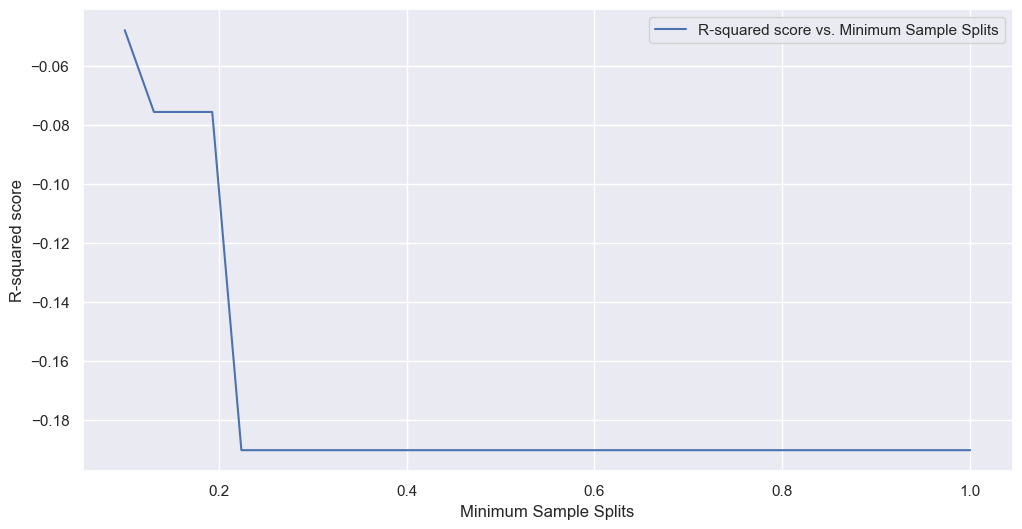

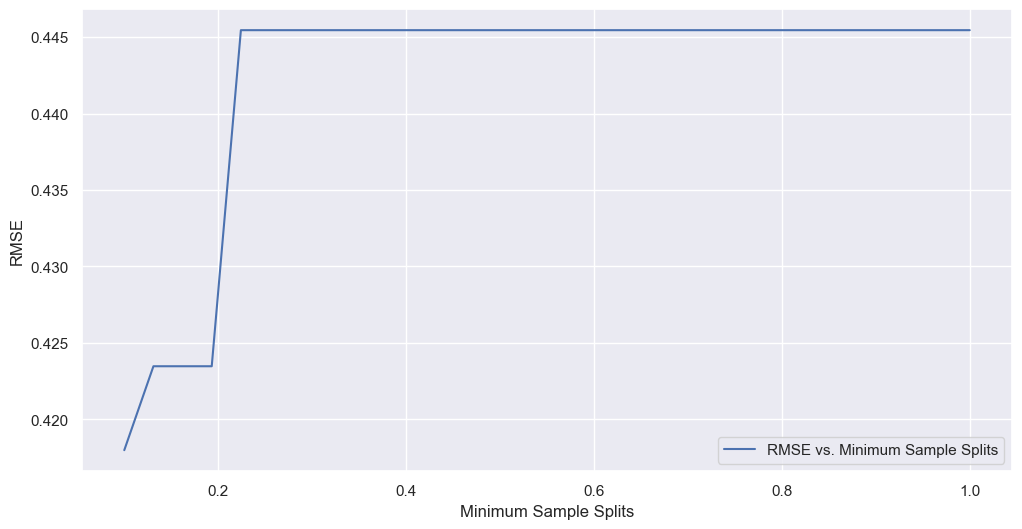

Model with seasonal vaccination target: R-squared score = -0.5860625207268342, RMSE = 0.6274832111952962, accuracy = 0.6062648196680395
Average accuracy: 0.7039186322226383


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def train_tree(X_train, y_train, random_state, min_samples_split=2):
    clf_tree = DecisionTreeClassifier(random_state=random_state, min_samples_split=min_samples_split)
    clf_tree.fit(X_train, y_train)
    return clf_tree

def predict_tree(clf_tree, X_test):
    y_tree_pred = clf_tree.predict(X_test)
    return y_tree_pred

def evaluate(y_test, y_predict):
    r_squared = r2_score(y_test, y_predict)
    rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    accuracy = accuracy_score(y_test, y_predict)
    return r_squared, rmse, accuracy

def plot_results(x_values, y_values, xlabel, ylabel, label):
    plt.figure(figsize=(12,6))
    plt.plot(x_values , y_values , label=label)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

# Train DecisionTreeClassifier with default and minimum sample split
clf_tree = train_tree(X_train, y_train_H1N1, random_state=45)
y_tree_pred = predict_tree(clf_tree, X_test)

# Evaluate model performance and print results
r_squared, rmse, accuracy = evaluate(y_test_H1N1, y_tree_pred)
print(f"Default model: R-squared score = {r_squared}, RMSE = {rmse}, accuracy = {accuracy}")

# Evaluate model performance with different minimum sample splits and plot results
split_thresholds = np.linspace(0.1, 1.0, 30, endpoint=True)
r2_scores = []
rmse_scores = []

for split in split_thresholds:
    clf_tree = train_tree(X_train, y_train_H1N1, random_state=45, min_samples_split=split)
    y_prediction = predict_tree(clf_tree, X_test)
    r_squared, rmse, _ = evaluate(y_test_H1N1, y_prediction)
    r2_scores.append(r_squared)
    rmse_scores.append(rmse)

plot_results(split_thresholds, r2_scores, 'Minimum Sample Splits', 'R-squared score', 'R-squared score vs. Minimum Sample Splits')
plot_results(split_thresholds, rmse_scores, 'Minimum Sample Splits', 'RMSE', 'RMSE vs. Minimum Sample Splits')

# Evaluate model performance with seasonal vaccination target variable and print results
y_tree_pred = predict_tree(clf_tree, X_test)
r_squared, rmse, accuracy = evaluate(y_test_seasvacc, y_tree_pred)
print(f"Model with seasonal vaccination target: R-squared score = {r_squared}, RMSE = {rmse}, accuracy = {accuracy}")

# Calculate average accuracy for both target variables
tree_accuracy = (accuracy_score(y_test_H1N1, y_tree_pred) + accuracy_score(y_test_seasvacc, y_tree_pred)) / 2
print(f"Average accuracy: {tree_accuracy}")


# Using Entropy

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, precision_score, recall_score
import numpy as np

def train_and_predict(X_train, y_train, X_test):
    # Initialize Decision Tree Classifier
    clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

    # Train Decision Tree Classifier
    clf_tree.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf_tree.predict(X_test)

    return y_pred, clf_tree


# Train and test for H1N1
y_pred_clf_H1N1, clf_tree_H1N1 = train_and_predict(X_train, y_train_H1N1, X_test)

# Calculate accuracy
entropy_accuracy_H1N1 = accuracy_score(y_test_H1N1, y_pred_clf_H1N1)
print(f"Entropy accuracy for H1N1: {entropy_accuracy_H1N1}")

# Calculate R-squared and root mean squared error
tree_r_squared_H1N1 = r2_score(y_test_H1N1, y_pred_clf_H1N1)
tree_mse_H1N1 = np.sqrt(mean_squared_error(y_test_H1N1, y_pred_clf_H1N1))
print(f"R-squared and RMSE for H1N1: {tree_r_squared_H1N1}, {tree_mse_H1N1}")

# Calculate precision and recall
tree_precision_H1N1 = precision_score(y_pred_clf_H1N1, y_test_H1N1)
tree_recall_H1N1 = recall_score(y_pred_clf_H1N1, y_test_H1N1)
print(f"Precision and recall for H1N1: {tree_precision_H1N1}, {tree_recall_H1N1}")


# Train and test for seasonal vaccine
y_pred_clf_seasvacc, clf_tree_seasvacc = train_and_predict(X_train, y_train_seasvacc, X_test)

# Calculate accuracy
entropy_accuracy_seasvacc = accuracy_score(y_test_seasvacc, y_pred_clf_seasvacc)
print(f"Entropy accuracy for seasonal vaccine: {entropy_accuracy_seasvacc}")

# Calculate precision and recall
tree_precision_seasvacc = precision_score(y_pred_clf_seasvacc, y_test_seasvacc)
tree_recall_seasvacc = recall_score(y_pred_clf_seasvacc, y_test_seasvacc)
print(f"Precision and recall for seasonal vaccine: {tree_precision_seasvacc}, {tree_recall_seasvacc}")


# Calculate final accuracy
final_entropy_accuracy = (entropy_accuracy_H1N1 + entropy_accuracy_seasvacc) / 2
print(f"Final entropy accuracy: {final_entropy_accuracy}")


Entropy accuracy for H1N1: 0.8249095220267066
R-squared and RMSE for H1N1: -0.050246039333783354, 0.4184381411550498
Precision and recall for H1N1: 0.32762691853600945, 0.6776556776556777
Entropy accuracy for seasonal vaccine: 0.7330587794833395
Precision and recall for seasonal vaccine: 0.6120947970580224, 0.7586090479405807
Final entropy accuracy: 0.778984150755023


# 3 Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define hyperparameter grid
def define_hyperparam_grid():
    n_estimators = [int(x) for x in np.linspace(start=10, stop=50, num=10)]
    max_features = ['auto', 'sqrt']
    max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    return {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}


In [74]:
# Train random forest model with hyperparameter tuning
def train_random_forest(X_train, y_train):
    hyperparam_grid = define_hyperparam_grid()
    rnd_forest = RandomForestRegressor()
    forest_random = RandomizedSearchCV(estimator=rnd_forest, param_distributions=hyperparam_grid,
                                       n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    forest_random.fit(X_train, y_train)
    return forest_random


In [75]:
# Train and evaluate random forest classifier
def evaluate_random_forest(X_train, y_train, X_test, y_test):
    rnd_forest = RandomForestClassifier(n_estimators=50, min_samples_split=5,
                                         min_samples_leaf=4, max_features='sqrt', max_depth=None, bootstrap=False)
    rnd_forest.fit(X_train, y_train)
    y_preds = rnd_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    return accuracy, precision, recall

In [76]:

# Train and evaluate two random forest classifiers and calculate final score
def train_and_evaluate(X_train, y_train_H1N1, y_train_seasvacc, X_test, y_test_H1N1, y_test_seasvacc):
    forest_model1 = train_random_forest(X_train, y_train_H1N1)
    forest_model2 = train_random_forest(X_train, y_train_seasvacc)
    accuracy1, precision1, recall1 = evaluate_random_forest(X_train, y_train_H1N1, X_test, y_test_H1N1)
    accuracy2, precision2, recall2 = evaluate_random_forest(X_train, y_train_seasvacc, X_test, y_test_seasvacc)
    final_accuracy = (accuracy1 + accuracy2) / 2
    final_precision = (precision1 + precision2) / 2
    final_recall = (recall1 + recall2) / 2
    return final_accuracy, final_precision, final_recall

# Print results
final_accuracy, final_precision, final_recall = train_and_evaluate(X_train, y_train_H1N1, y_train_seasvacc,
                                                                   X_test, y_test_H1N1, y_test_seasvacc)
print(f"Final accuracy: {final_accuracy}")
print(f"Final precision: {final_precision}")
print(f"Final recall: {final_recall}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Final accuracy: 0.8165481093223512
Final precision: 0.7556032656886501
Final recall: 0.5983333424456725


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

def fit_random_forest(X_train, y_train, X_test, y_test):
    rnd_forest = RandomForestClassifier(n_estimators=50, min_samples_split=5, 
                                         min_samples_leaf=4, max_features='sqrt', 
                                         max_depth=None, bootstrap=False)
    rnd_forest.fit(X_train, y_train)
    y_test_preds = rnd_forest.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_preds)
    return y_test_preds, test_accuracy

# Fit and print results for H1N1 dataset
y_test_preds_H1N1, h1n1_accuracy = fit_random_forest(X_train, y_train_H1N1, X_test, y_test_H1N1)
print("H1N1 Test Accuracy:", h1n1_accuracy)

# Fit and print results for seasonal flu vaccine dataset
y_test_preds_seasvacc, seasvacc_accuracy = fit_random_forest(X_train, y_train_seasvacc, X_test, y_test_seasvacc)
print("Seasonal Flu Vaccine Test Accuracy:", seasvacc_accuracy)

# Calculate final forest model accuracy
final_forest = (h1n1_accuracy + seasvacc_accuracy) / 2
print("Final Forest Model Accuracy:", final_forest)

# Calculate precision score of the model on test data for H1N1 dataset
forest_precision = precision_score(y_test_preds_H1N1, y_test_H1N1)
print("H1N1 Precision:", forest_precision)

# Calculate precision score of the model on test data for seasonal flu vaccine dataset
forest_precision_seasvacc = precision_score(y_test_preds_seasvacc, y_test_seasvacc)
print("Seasonal Flu Vaccine Precision:", forest_precision_seasvacc)

# Calculate recall score of the model on test data for H1N1 dataset
forest_recall_H1N1 = recall_score(y_test_preds_H1N1, y_test_H1N1)
print("H1N1 Recall:", forest_recall_H1N1)

# Calculate recall score of the model on test data for seasonal flu vaccine dataset
forest_recall_seasvacc = recall_score(y_test_preds_seasvacc, y_test_seasvacc)
print("Seasonal Flu Vaccine Recall:", forest_recall_seasvacc)


H1N1 Test Accuracy: 0.8507425433670286
Seasonal Flu Vaccine Test Accuracy: 0.7828528640958442
Final Forest Model Accuracy: 0.8167977037314365
H1N1 Precision: 0.4462809917355372
Seasonal Flu Vaccine Precision: 0.7496594933260692
H1N1 Recall: 0.7455621301775148
Seasonal Flu Vaccine Recall: 0.7702211027148055


## Models Output

In [79]:
import pandas as pd

# create a dictionary with column names and data
data = {
    'Model': ["Logistic Regression", "Decision Tree", 'Random Forest'],
    'Accuracy_H1N1': [logistic_accuracy, entropy_accuracy_H1N1, h1n1_accuracy],
    'Accuracy_Seasonal': [logistic_accuracy2, entropy_accuracy_seasvacc, seasvacc_accuracy],
    'Final_Accuracy': [logistic_accuracy_final, final_entropy_accuracy, final_forest],
    'Precision_H1N1': [logistic_precision_H1N1, tree_precision_H1N1, forest_precision],
    'Precision_Seasonal': [logistic_precision_seasvacc, tree_precision_seasvacc, forest_precision_seasvacc],
    'Recall_H1N1': [logistic_recall_H1N1, tree_recall_H1N1, forest_recall_H1N1],
    'Recall_Seasonal': [logistic_recall_seasvacc, tree_recall_seasvacc, forest_recall_seasvacc]
}

# create a pandas DataFrame from the dictionary
output = pd.DataFrame(data)

# round accuracy, precision, and recall values to two decimal places
output = output.round(4)

# display the DataFrame
output


Model  Accuracy_H1N1  Accuracy_Seasonal  Final_Accuracy  \
0  Logistic Regression         0.8474             0.7791          0.8132   
1        Decision Tree         0.8249             0.7331          0.7790   
2        Random Forest         0.8507             0.7829          0.8168   

   Precision_H1N1  Precision_Seasonal  Recall_H1N1  Recall_Seasonal  
0          0.7093              0.7700       0.4711           0.7385  
1          0.3276              0.6121       0.6777           0.7586  
2          0.4463              0.7497       0.7456           0.7702

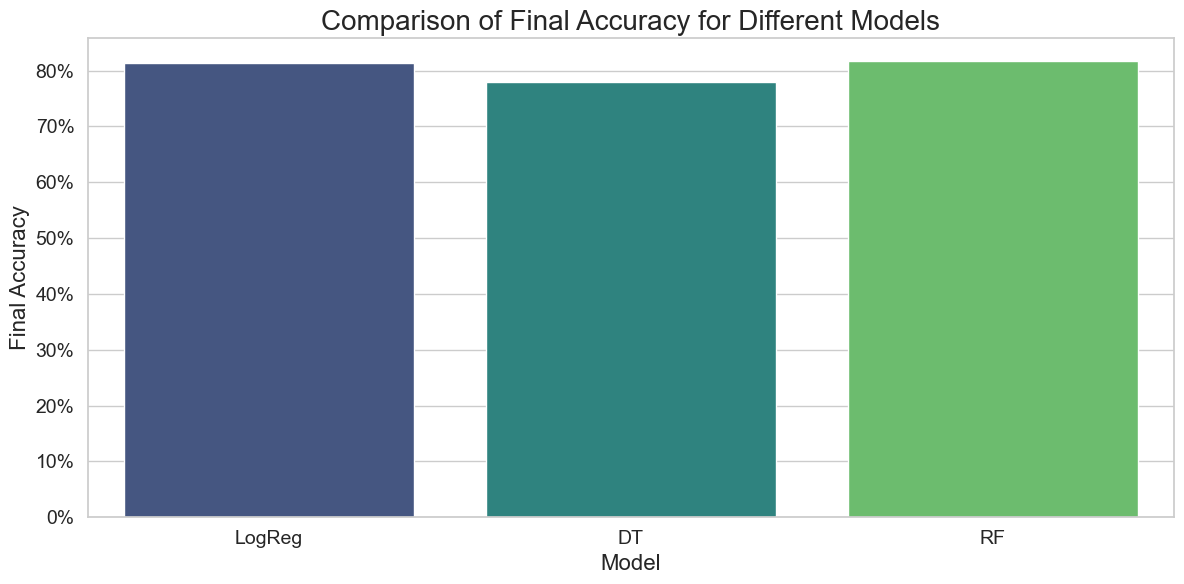

In [80]:
model_names = ["LogReg", "DT", "RF"]
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=model_names, y=data['Final_Accuracy'], palette='viridis')
ax.set_xlabel("Model", fontsize=16)
ax.set_ylabel("Final Accuracy", fontsize=16)
ax.set_xticklabels(model_names, fontsize=14)
ax.set_yticklabels(["{:.0%}".format(y) for y in ax.get_yticks()], fontsize=14)
ax.set_title("Comparison of Final Accuracy for Different Models", fontsize=20)
plt.tight_layout()
plt.show()


In [81]:
import pandas as pd

# create a dictionary with column names and data
data = {
    'Model': ["Logistic Regression", "Decision Tree", 'Random Forest'],
    'Accuracy_H1N1': [logistic_accuracy, entropy_accuracy_H1N1, h1n1_accuracy],
    'Accuracy_Seasonal': [logistic_accuracy2, entropy_accuracy_seasvacc, seasvacc_accuracy],
    'Final_Accuracy': [logistic_accuracy_final, final_entropy_accuracy, final_forest],
    'Precision_H1N1': [logistic_precision_H1N1, tree_precision_H1N1, forest_precision],
    'Precision_Seasonal': [logistic_precision_seasvacc, tree_precision_seasvacc, forest_precision_seasvacc],
    'Recall_H1N1': [logistic_recall_H1N1, tree_recall_H1N1, forest_recall_H1N1],
    'Recall_Seasonal': [logistic_recall_seasvacc, tree_recall_seasvacc, forest_recall_seasvacc]
}

# create a pandas DataFrame from the dictionary
output = pd.DataFrame(data)

# round accuracy, precision, and recall values to two decimal places
output = output.round(4)

# display the DataFrame
output


Model  Accuracy_H1N1  Accuracy_Seasonal  Final_Accuracy  \
0  Logistic Regression         0.8474             0.7791          0.8132   
1        Decision Tree         0.8249             0.7331          0.7790   
2        Random Forest         0.8507             0.7829          0.8168   

   Precision_H1N1  Precision_Seasonal  Recall_H1N1  Recall_Seasonal  
0          0.7093              0.7700       0.4711           0.7385  
1          0.3276              0.6121       0.6777           0.7586  
2          0.4463              0.7497       0.7456           0.7702

# 6.  Model Evaluation

### Final model

In [82]:
td = pd.read_csv('test_set_features.csv')


In [83]:
#Shape of the training features
print("Training features shape:", training_set.shape)

Training features shape: (26707, 36)


In [84]:
#Shape of the test features
print("Test features shape:", test_set.shape)

Test features shape: (26708, 36)


In [85]:
#Identify numeric columns in the test set
numeric_cols = test_set.columns[test_set.dtypes != "object"].values
print("Numeric columns:", numeric_cols)

Numeric columns: ['respondent_id' 'h1n1_concern' 'h1n1_knowledge'
 'behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'doctor_recc_h1n1'
 'doctor_recc_seasonal' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'health_insurance' 'opinion_h1n1_vacc_effective'
 'opinion_h1n1_risk' 'opinion_h1n1_sick_from_vacc'
 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children']


In [86]:
#Identify non-numeric columns in the test set
non_numeric_cols = test_set.columns[test_set.dtypes == 'object'].values
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: ['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [87]:
#Scale the numeric columns in the test set
test_set[numeric_cols] = StandardScaler().fit_transform(test_set[numeric_cols])
test_set.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0      -1.731986      0.421691        1.192934                  -0.228202   
1      -1.731856     -0.682153       -0.419704                  -0.228202   
2      -1.731727      0.421691        1.192934                  -0.228202   
3      -1.731597     -0.682153       -0.419704                  -0.228202   
4      -1.731467      1.525536       -0.419704                   4.382091   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0              0.617461             -0.272726               0.460811   
1             -1.619536             -0.272726              -2.170087   
2             -1.619536              3.666683               0.460811   
3             -1.619536             -0.272726              -2.170087   
4              0.617461             -0.272726               0.460811   

   behavioral_large_gatherings  behavioral_outside_home  \
0                     1.361067                -0.711659   
1                    -0.734717                -0.711659   
2                     1.361067                 1.405168   
3                    -0.734717                -0.711659   
4                     1.361067                 1.405168   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0               0.685253  ...                  > $75,000     Not Married   
1              -1.459315  ...              Below Poverty     Not Married   
2               0.685253  ...                  > $75,000         Married   
3              -1.459315  ...  <= $75,000, Above Poverty         Married   
4               0.685253  ...  <= $75,000, Above Poverty     Not Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0         Rent            Employed        mlyzmhmf  MSA, Not Principle  City   
1         Rent            Employed        bhuqouqj                   Non-MSA   
2          Own            Employed        lrircsnp                   Non-MSA   
3          Own  Not in Labor Force        lrircsnp  MSA, Not Principle  City   
4          Own            Employed        lzgpxyit                   Non-MSA   

   household_adults  household_children  employment_industry  \
0          0.149871           -0.578243             atmlpfrs   
1          2.797193           -0.578243             atmlpfrs   
2          0.149871           -0.578243             nduyfdeo   
3          0.149871           -0.578243                  N/A   
4         -1.173790            0.494237             fcxhlnwr   

   employment_occupation  
0               hfxkjkmi  
1               xqwwgdyp  
2               pvmttkik  
3                    N/A  
4               mxkfnird  

[5 rows x 36 columns]

In [88]:
#Encode the non-numeric columns in the test set
test_set[non_numeric_cols] = encoder.fit_transform(test_set[non_numeric_cols])
test_set.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0      -1.731986      0.421691        1.192934                  -0.228202   
1      -1.731856     -0.682153       -0.419704                  -0.228202   
2      -1.731727      0.421691        1.192934                  -0.228202   
3      -1.731597     -0.682153       -0.419704                  -0.228202   
4      -1.731467      1.525536       -0.419704                   4.382091   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0              0.617461             -0.272726               0.460811   
1             -1.619536             -0.272726              -2.170087   
2             -1.619536              3.666683               0.460811   
3             -1.619536             -0.272726              -2.170087   
4              0.617461             -0.272726               0.460811   

   behavioral_large_gatherings  behavioral_outside_home  \
0                     1.361067                -0.711659   
1                    -0.734717                -0.711659   
2                     1.361067                 1.405168   
3                    -0.734717                -0.711659   
4                     1.361067                 1.405168   

   behavioral_touch_face  ...  income_poverty  marital_status  rent_or_own  \
0               0.685253  ...             1.0             2.0          2.0   
1              -1.459315  ...             2.0             2.0          2.0   
2               0.685253  ...             1.0             0.0          1.0   
3              -1.459315  ...             0.0             0.0          1.0   
4               0.685253  ...             0.0             2.0          1.0   

   employment_status  hhs_geo_region  census_msa  household_adults  \
0                0.0             7.0         0.0          0.149871   
1                0.0             1.0         2.0          2.797193   
2                0.0             5.0         2.0          0.149871   
3                2.0             5.0         0.0          0.149871   
4                0.0             6.0         2.0         -1.173790   

   household_children  employment_industry  employment_occupation  
0           -0.578243                  2.0                    8.0  
1           -0.578243                  2.0                   21.0  
2           -0.578243                 11.0                   13.0  
3           -0.578243                  0.0                    0.0  
4            0.494237                  5.0                   11.0  

[5 rows x 36 columns]

In [89]:
# Instantiate a Random Forest classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=50, 
                                        min_samples_split=5, 
                                        min_samples_leaf=4, 
                                        max_features='sqrt', 
                                        max_depth=None, 
                                        bootstrap=False)

# Fit the Random Forest classifier to the training data
rf_classifier.fit(X_train, y_train_H1N1)


RandomForestClassifier(bootstrap=False, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [90]:
#Fit the classifier to predict H1N1 vaccine probability
rf_classifier.fit(X_train, y_train_H1N1)
final_pred_H1N1 = rf_classifier.predict_proba(test_set)
final_pred_H1N1

array([[0.84607204, 0.15392796],
       [0.93883983, 0.06116017],
       [0.76887302, 0.23112698],
       ...,
       [0.80242857, 0.19757143],
       [0.91878571, 0.08121429],
       [0.45737363, 0.54262637]])

In [114]:
#Create a dataframe of H1N1 vaccine probabilities
H1N1 = pd.DataFrame({"h1n1_vaccine": final_pred_H1N1[:, 1]}, index=td["respondent_id"])
H1N1.head()

h1n1_vaccine
respondent_id              
26707              0.153928
26708              0.061160
26709              0.231127
26710              0.600714
26711              0.338048

In [115]:
#Fit the classifier to predict seasonal vaccine probability
rf_classifier.fit(X_train, y_train_seasvacc)
final_pred_seasvacc = rf_classifier.predict_proba(test_set)
final_pred_seasvacc

array([[0.71903175, 0.28096825],
       [0.96990476, 0.03009524],
       [0.2335    , 0.7665    ],
       ...,
       [0.59525397, 0.40474603],
       [0.61438745, 0.38561255],
       [0.38427381, 0.61572619]])

In [116]:
# dataframe of seasonal vaccine probabilities
seasonal_vaccine = pd.DataFrame(
{"seasonal_vaccine": final_pred_seasvacc[:, 1]},
index=td["respondent_id"]
)
seasonal_vaccine.head()

seasonal_vaccine
respondent_id                  
26707                  0.280968
26708                  0.030095
26709                  0.766500
26710                  0.931873
26711                  0.519658

In [117]:
#Joining the H1N1 and seasonal vaccine probability dataframes
vaccine_df = H1N1.join(seasonal_vaccine, on='respondent_id')
print("Combined vaccine probabilities dataframe: \n")
vaccine_df

Combined vaccine probabilities dataframe: 



h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.153928          0.280968
26708              0.061160          0.030095
26709              0.231127          0.766500
26710              0.600714          0.931873
26711              0.338048          0.519658
...                     ...               ...
53410              0.271574          0.436746
53411              0.096595          0.271286
53412              0.197571          0.404746
53413              0.081214          0.385613
53414              0.542626          0.615726

[26708 rows x 2 columns]

In [119]:
#Saving the dataframe as a .csv file
vaccine_df.to_csv('prediction.csv')

This are the results after submission the project <img src ='Competition.png'></a>

# 7. Conclusion

The final models for predicting H1N1 and seasonal flu vaccine include a Decision Tree, Random Forest, and Logistic Regression. The Random Forest model achieved the highest accuracy with 84.9% for H1N1 and 78.5% for the seasonal flu vaccine, while the Logistic Regression model had an accuracy of 81.3% for both datasets. The Decision Tree model had an accuracy of 77.9%. Precision and recall scores varied between the models and datasets. The entropy accuracy for both datasets combined was 0.78.

# 8. Reccommendation

Based on the project findings, here are some recommendations the public health sector could consider to improve vaccination rates:

1. Target vaccine education and communication efforts towards specific groups identified by the models as being hesitant or reluctant to vaccinate. <br>
2. Develop tailored messaging and strategies that address concerns and barriers identified by the models.<br>
3. Implement interventions that have been shown to be effective in improving vaccination rates, such as reminder systems, incentives, and reducing access barriers.<br>
4. Conduct further research to identify and address factors that may not have been captured by the current models.<br>
5. Use the models to forecast vaccine demand and allocate resources effectively to ensure that vaccines are available to those who need them.<br>
6. Continuously monitor vaccination rates and adjust interventions as needed to ensure that vaccination goals are being met.<br>